##### For the lifespan simulation we can consider two models: one tracks population of somatic and stem cells and another one simulates the system of somatic cells and mutants only.

##### Both models are based on following assumptions:

- From all hallmarks of aging we take into account only somatic mutations.
- Risk of death for somatic cells increases with the size of mutants population.
- Stem cells don't die, they just proliferate and mutate.
- The rate of somatic mutations is constant through the course of life.
- Regeneration of a tissue depends on the amount of alive cells (the less there are healthy cells, the more the tissue tries to regenerate).
- Cells are not supplied to an organ.
- There are 0 mutations at t = 0.

##### We can convert all these assumptions into a mathematical model the following way:

$$
    \frac{dX}{dt} = rX(1 - \frac{X}{K}) - \alpha X + 2\epsilon Y - \mu(X, Y, t)
$$


$$
    \frac{dY}{dt} = \gamma Y(1 - \frac{Y}{M}) - \beta Y - \epsilon Y
$$


$$
    \mu(X, Y, t) = \sigma \frac{(\alpha X t + \beta Y t)^{2}}{2} [1 - \frac{X + Y}{K + M}] 
$$

##### We can break this system by parts for better understanding:

- The part $rX(1 - \frac{X}{K})$ and $\gamma Y(1 - \frac{Y}{M})$ corresponds to the assumption of regeneration. Here r and $\gamma$ are rates of restoration and $K$ and $M$ are maximum volumes that somatic and stem cells can take.
- $\alpha X$ and $\beta Y$ represent constant mutation rates that decrease a healthy population by some proportion every time step.
- $\epsilon Y$ and $2\epsilon Y$ correspond to decrease of stem cells due to proliferation and corresponding increment of somatic cells.
- $\mu(X, Y, t)$ represents the part of the equation that shows mortality function of the system.

From all the parts the most complicated is mortality function $\mu(X, Y, t)$, so, we will investigate it deeper right now.

From the assumptions we consider that risk of death increases with the amount of mutants and the space that they occupy. We can express it like this:

$$
    \frac{dX}{dt d\hat X} = \sigma \hat X
$$

In this equation $\sigma$ is the coefficient that shows the strength of dependence and $\hat X$ is the mutant population.

We can also define the derivative of mutant population with respect to time as:

$$
    \frac{d \hat X}{dt} = \alpha X + \beta Y = M
$$

Now we can rewrite the equation:

$$
    \int \frac{dX}{dt d\hat X} d\hat X = \int \sigma \hat X d \hat X \\
$$

$$
     \frac{dX}{dt} = \sigma \frac{\hat X^{2}}{2}
$$

We can approximate $\hat X$ as $Mt$, so, we get:

$$
    \frac{dX}{dt} = \sigma \frac{M^{2}t^{2}}{2}\\
    \frac{dX}{dt} = \sigma \frac{(\alpha X t + \beta Y t)^{2}}{2}
$$

So, we get the dependence that we've been looking for. The only thing that we can add right now is the factor of volume that is left. We can assume that the more volume mutants take, the faster is the death rate and vice versa. So:

$$
    \frac{dX}{dt} = \sigma \frac{(\alpha X t + \beta Y t)^{2}}{2}[1 - \frac{X + Y}{K + M}]
$$

Now everything should be clear for two-equation system.

##### Finally, we can model populations for different organisms using two-eqs system. For this purpose we export *lifespan_class* module that contains all the necessary functions for the simulation. 

In [3]:
from lifespan_class import *

##### The first organ that we'll inspect is human liver. Currently, it's the best model object, as it seems to be the most stable system.

In [4]:
liver_2eq_conf = Somatic_LS(organ = 'liver', equation='two', end_time=300)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: liver,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: two equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


##### There are a lot of functions that are present in the module, but the most interesting ones are those which calculate lifespan based on a set of the parameters. Class method .plot_curves() calculates the lifespan and plots the population that we are interested in.

Life expentancy (years): 142.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


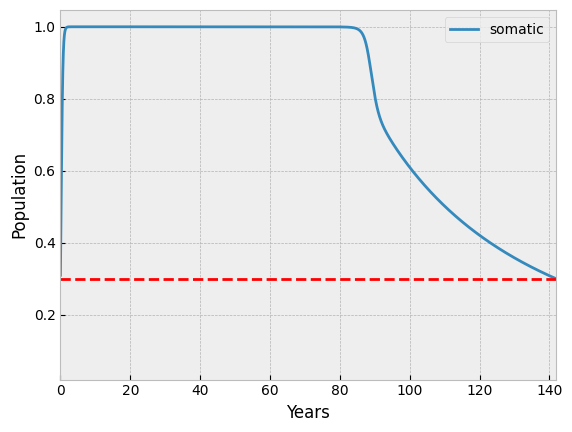

In [3]:
liver_2eq_conf.plot_curves(proportions=True, plot_thr=True)

##### We can also plot the mortality function if we are interested in it's behaviour. Here method .plot_curves() outputs lifespan, time of regeneration, time in years when the function takes a maximum value, maximum derivative and proportion of time when extremum is reached to total lifespan.

Life expentancy (years): 142.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
Max: 110.0
Max deriv: 495942385.0
Ratio of max deriv to total lifespan in %: 77.3


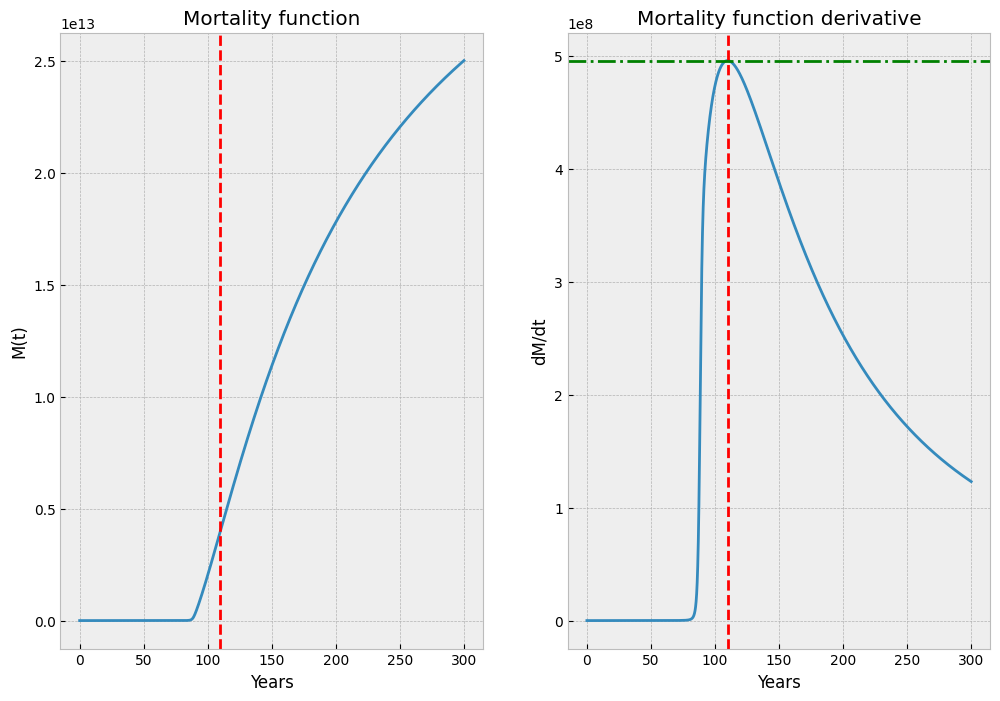

In [4]:
liver_2eq_conf.plot_curves('mortality function')

##### Here we can see that based on the 30% cutoff we expect maximum lifespan of a human liver as 142 years in the situation where only somatic mutations are present. This number is twice bigger than the average lifespan of a human and about 20 years larger than a maximum lifespan of a human.

##### We can also try to variate parameters of a system to see how much it is stable and if it has upper or lower limits. Class method .variator() accepts parameters to vary and their upper,lower bounds and sampling frequency.

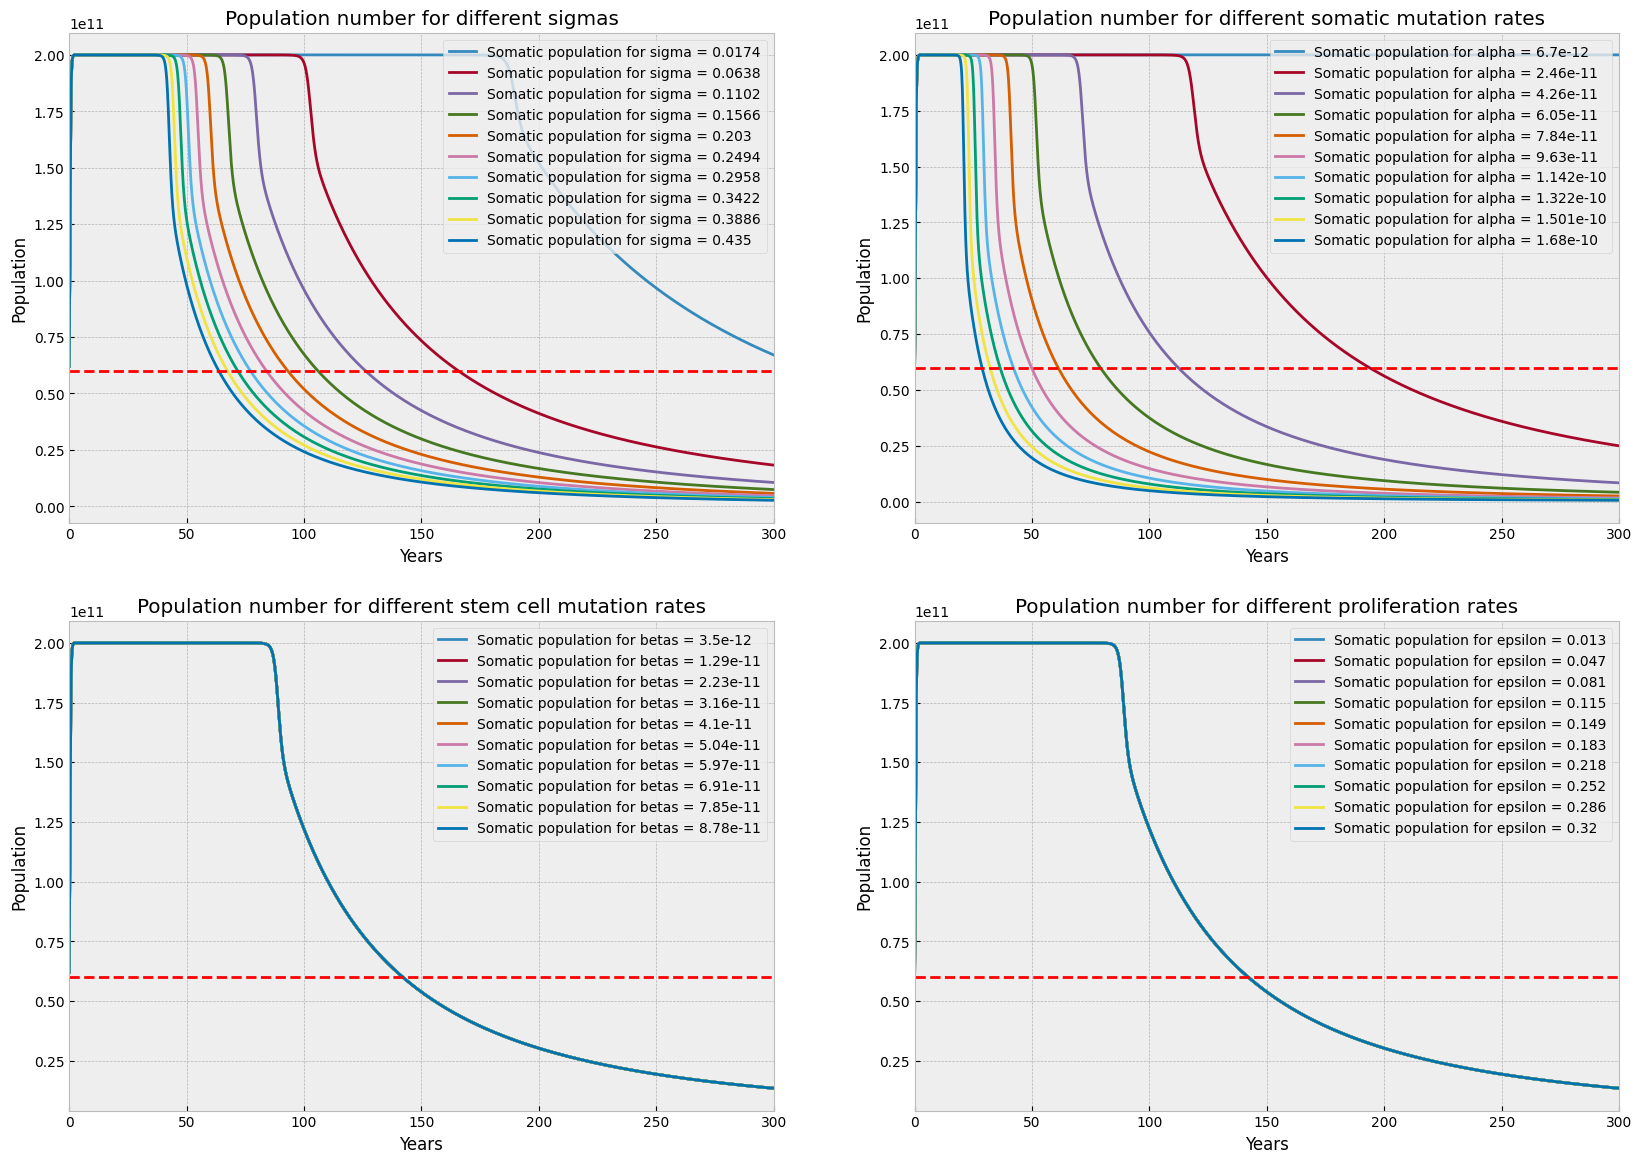

In [5]:
liver_2eq_conf.variator(x_bound=300, sampling_freq=10)

##### From the plot above we can see that from a set of ($\alpha, \sigma, \epsilon$ and $\beta$) we have a clear dependency only for the first two parameters. This fact can be explained by too low value of $M$ compared to $K$. So, if we change something in stem cells equation, this won't really influence somatic cells population.

##### We can see it in the following example: for liver maximum number of stem cells is ~100 000 times lower than maximum number of somatic cells. So, if we'll perturb $\epsilon$ and $\beta$ a little, the maximum increment in the risk function because of stem cells mutation and somatic population due to proliferation would be 50 000 - 100 000 times lower than somatic factors influence.

##### Also, variator function can perturb only one specific parameter: $\alpha, \sigma, r$. In this case the system also gives a resulting lifespan for the upper and lower bounds of the parameter. The next cells shows the results of variations.

Lower bound result:
Life expentancy (years): 65.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 6.82
----------------------------------------
Upper bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.27


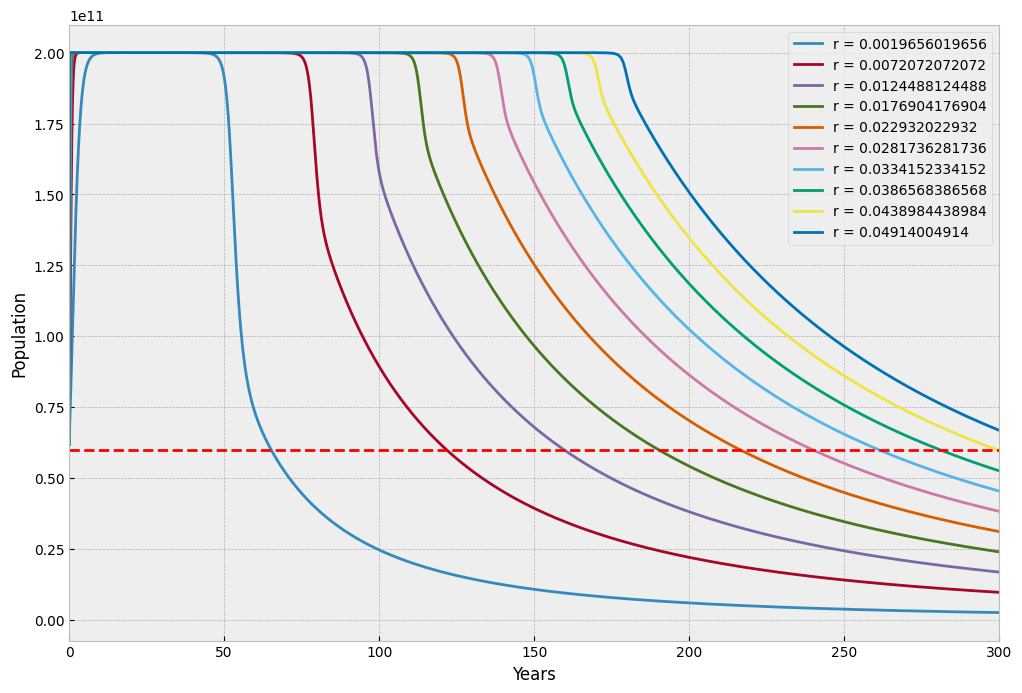

In [6]:
liver_2eq_conf.variator(sampling_freq=10, only_r=True)

Lower bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
----------------------------------------
Upper bound result:
Life expentancy (years): 29.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


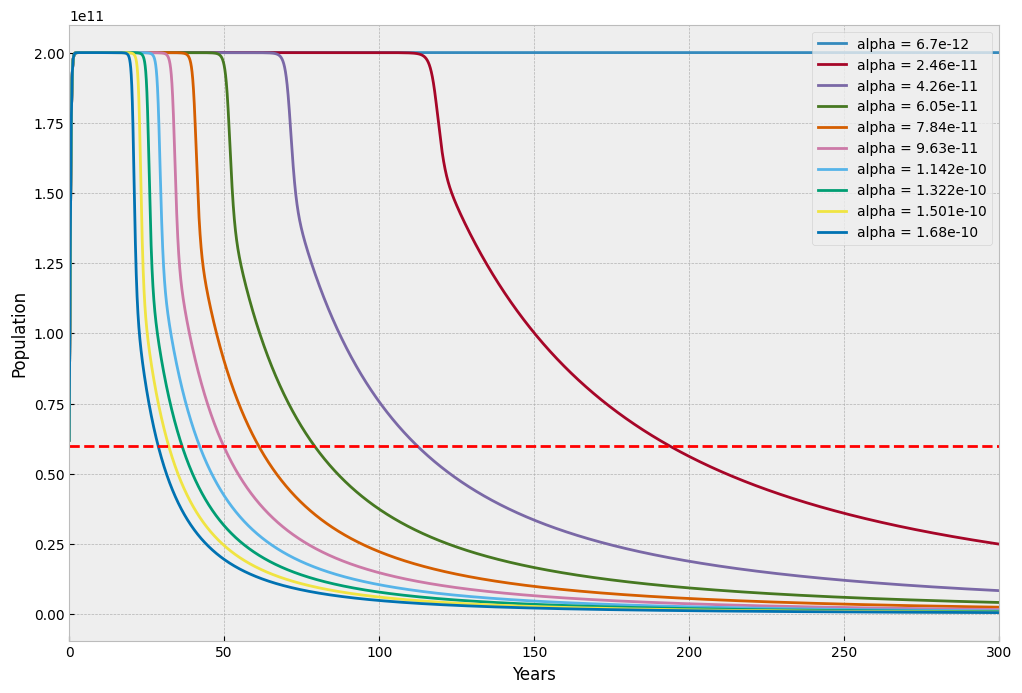

In [7]:
liver_2eq_conf.variator(sampling_freq=10, only_alpha=True)

Lower bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
----------------------------------------
Upper bound result:
Life expentancy (years): 64.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


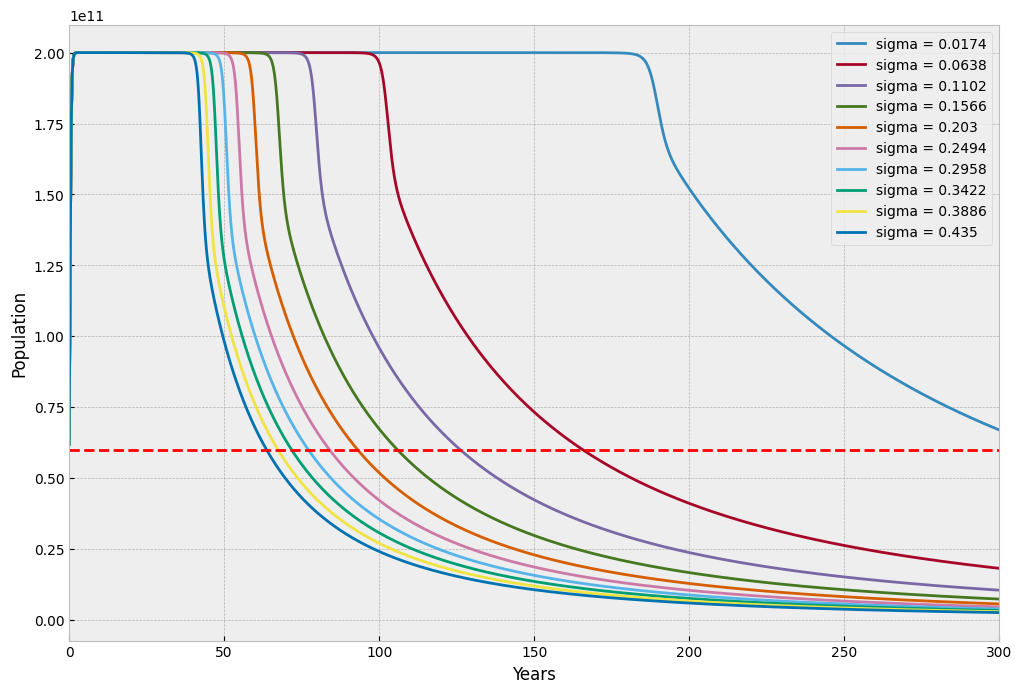

In [8]:
liver_2eq_conf.variator(sampling_freq=10, only_sigma=True)

##### We can see that, although the values of parameters are sampled as equidistant points, we can't see the same situation for curves. At some moment lifespans start to approach a limit that is given as an upper bound.

##### The next object is lung epithelium tissue. We can check lifespan, mortality function and also vary the parameters.

In [9]:
lungs_2eq_conf = Somatic_LS(organ='lungs', equation='two')


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: lungs,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: two equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


Life expentancy (years): 216.0
--------------------------------------------------
Havent regenerated


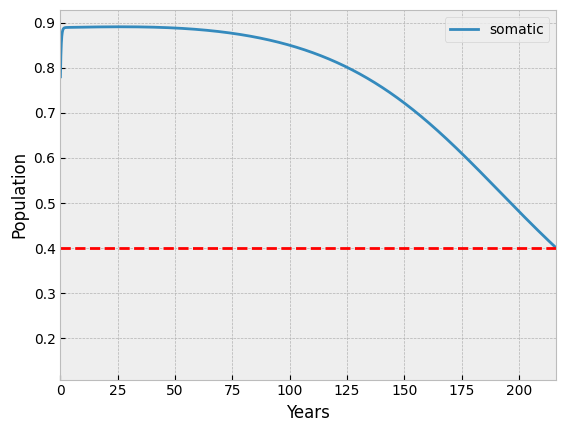

In [10]:
lungs_2eq_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 216.0
--------------------------------------------------
Havent regenerated
Max: 192.0
Max deriv: 140958.0
Ratio of max deriv to total lifespan in %: 88.7


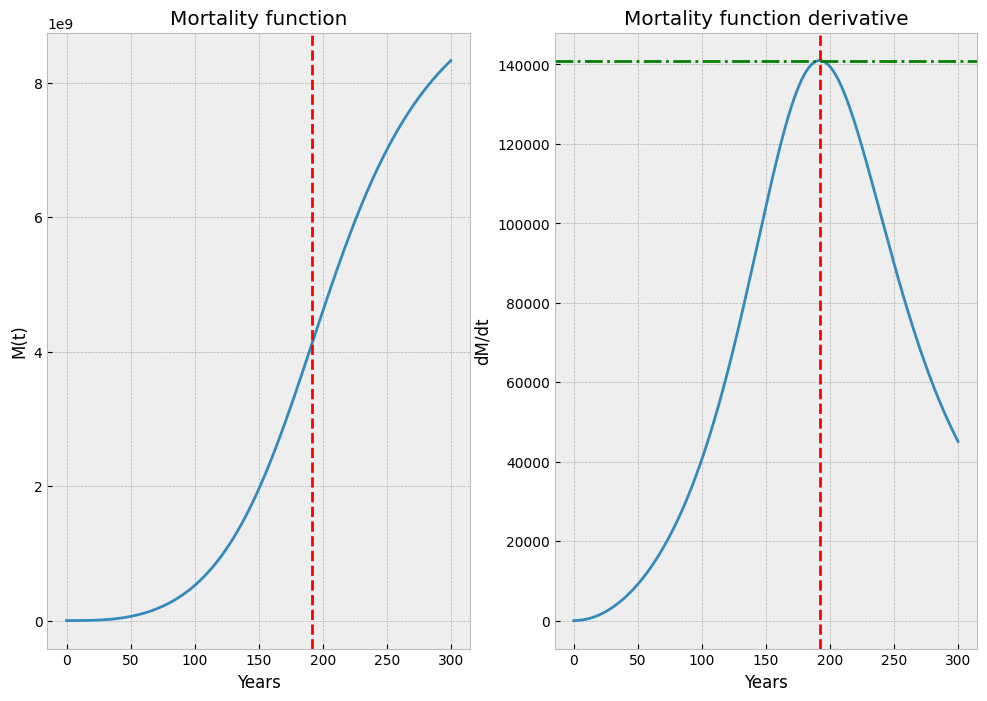

In [11]:
lungs_2eq_conf.plot_curves('mortality function')

##### We can see that though lung tissue hasn't regenerated, it lives for 70 years longer. This can be explained by lower mutation rates than in the liver. We can also consider this fact by looking on a mortality function. Compared to human liver tissue, the function is more smooth and maximum is reached later (at 0.887 of lifespan, compared to liver's 0.773).

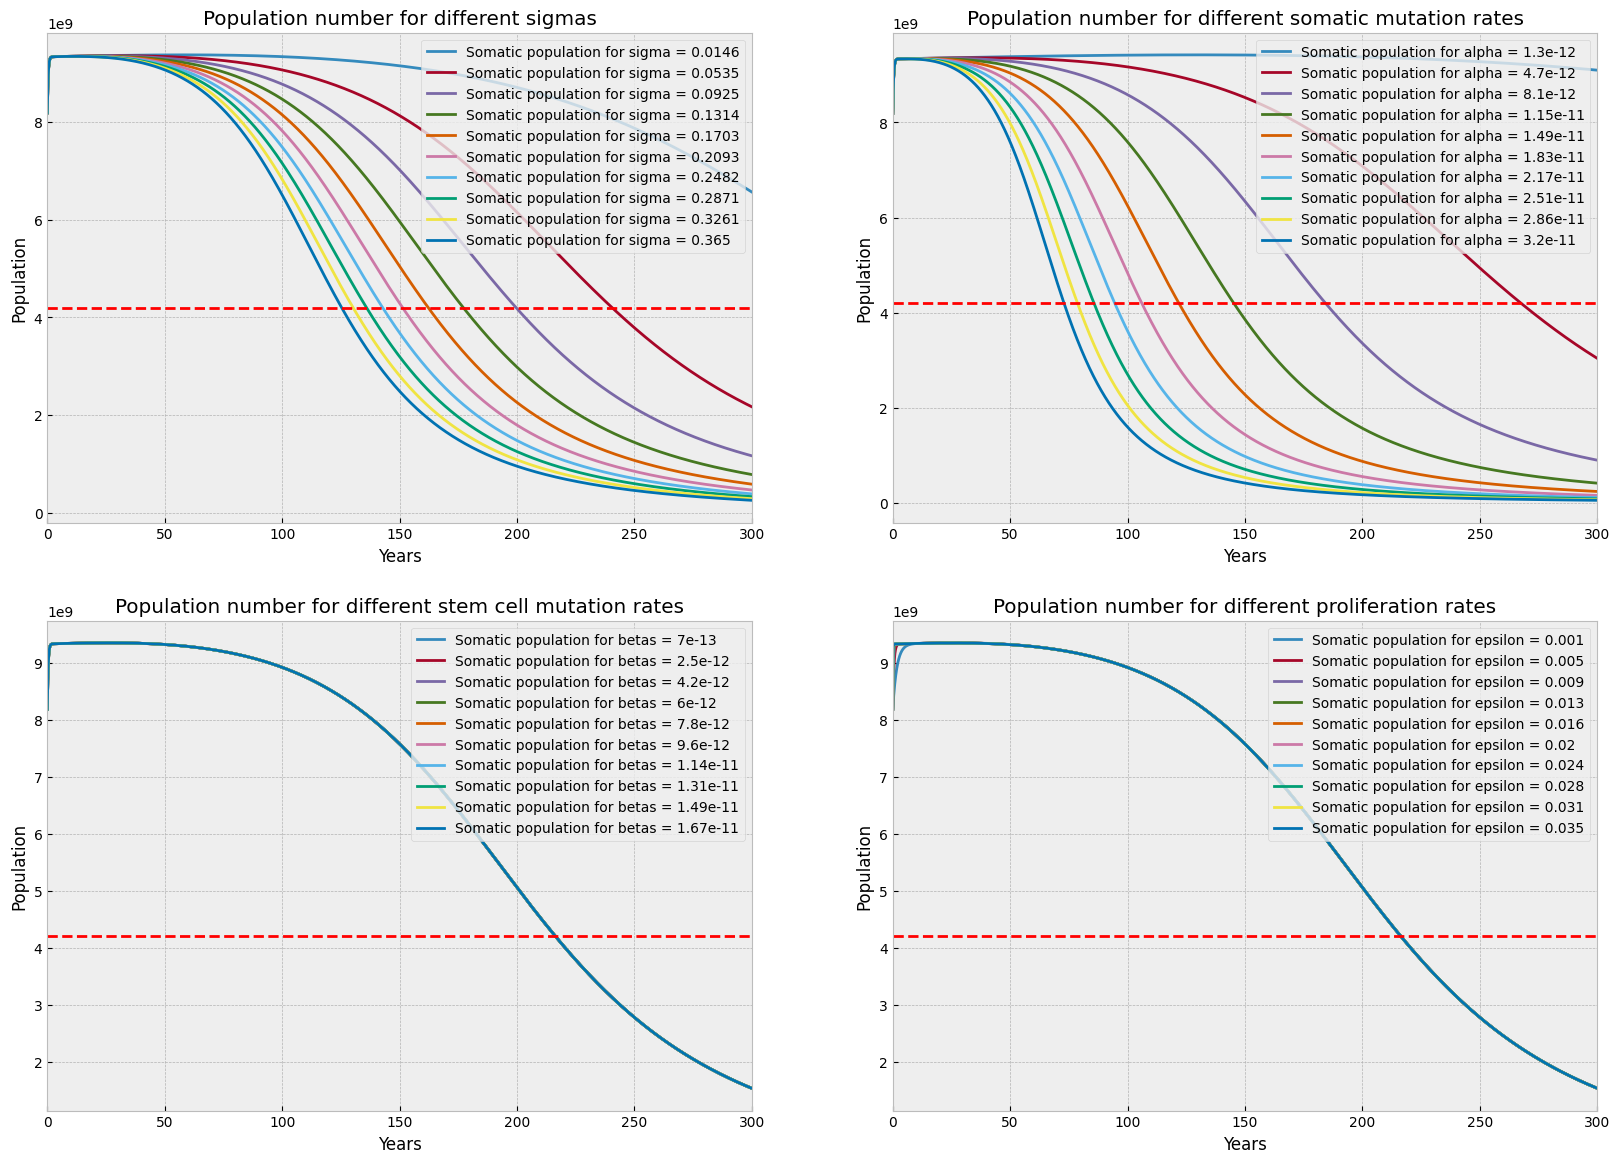

In [12]:
lungs_2eq_conf.variator(sampling_freq=10)

##### By varying the parameters, we can see that $\beta$ value again doesn't make any difference. But $\epsilon$ has a small influence. This fact takes place because for lung eputhelium $M/K = 0.07$. This proportion is much higher than for liver cells.

Lower bound result:
Life expentancy (years): 212.0
--------------------------------------------------
Havent regenerated
----------------------------------------
Upper bound result:
Life expentancy (years): 235.0
--------------------------------------------------
Havent regenerated


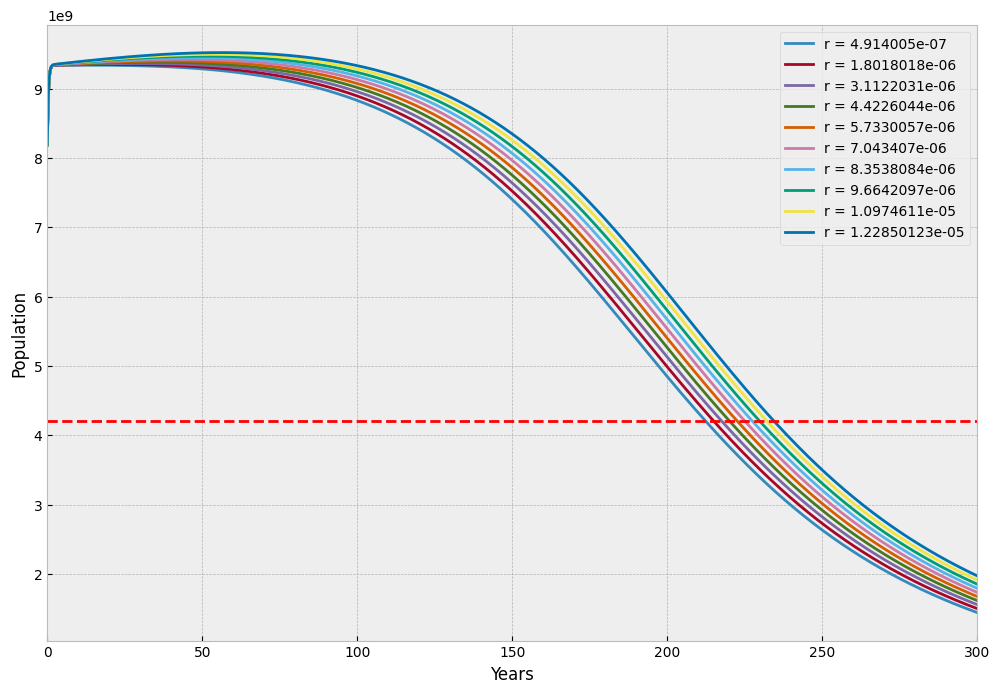

In [13]:
lungs_2eq_conf.variator(sampling_freq=10, only_r=True)

Lower bound result:
Havent died
--------------------------------------------------
Havent regenerated
----------------------------------------
Upper bound result:
Life expentancy (years): 73.0
--------------------------------------------------
Havent regenerated


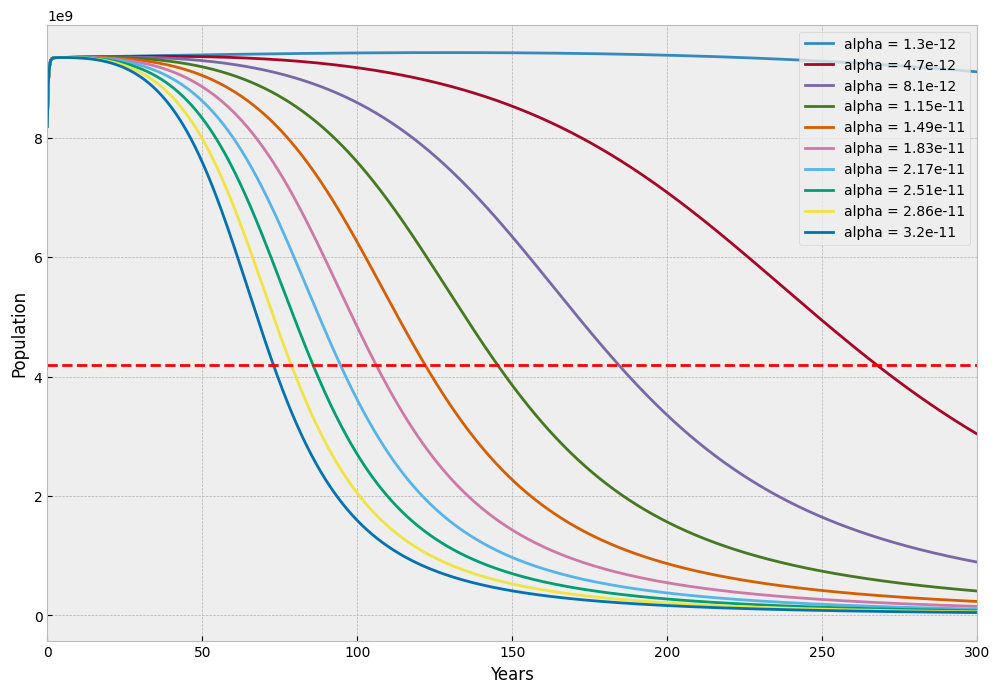

In [14]:
lungs_2eq_conf.variator(sampling_freq=10, only_alpha=True)

Lower bound result:
Havent died
--------------------------------------------------
Havent regenerated
----------------------------------------
Upper bound result:
Life expentancy (years): 125.0
--------------------------------------------------
Havent regenerated


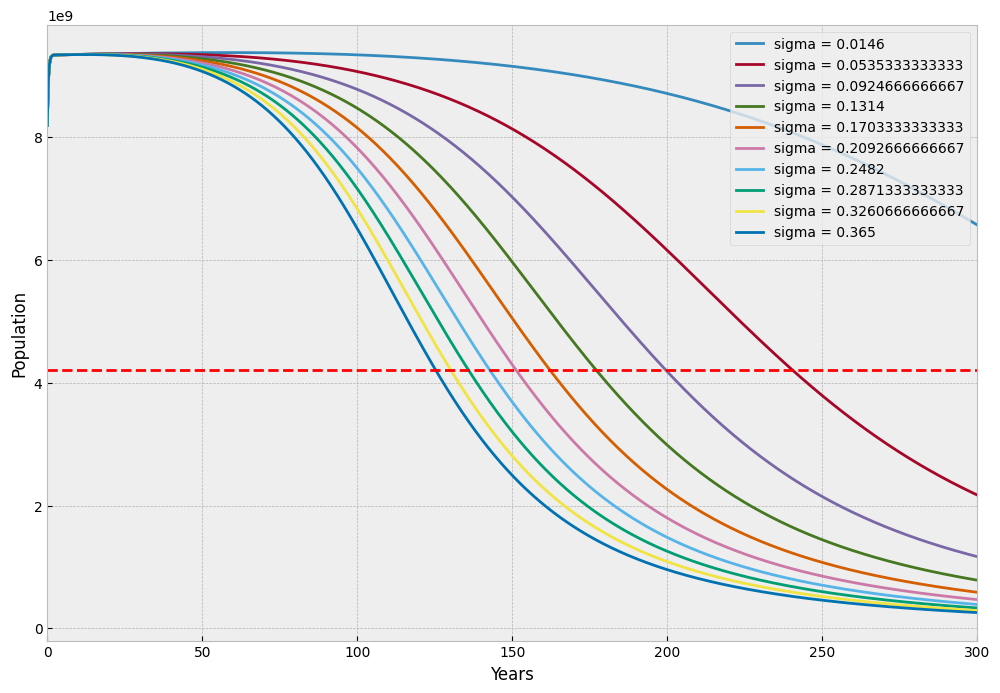

In [15]:
lungs_2eq_conf.variator(sampling_freq=10,only_sigma=True)

##### Variation of single parameters shows low influence of $r$ on the lifespan and a similar pattern for $\sigma$ and $\alpha$. We can again see that equidistant parameters sampling doesn't result in equidistant lifespan distribution.

##### The last object for two-eqs system is mouse liver. The assumption for this organ is that the ratio of $K/M$, $\epsilon$ and $\sigma$ values are the same as for a human liver. $\alpha$ and $\beta$ are taken according to https://doi.org/10.1038/s41586-022-04618-z article. 

In [16]:
mouse_2eq_conf = Somatic_LS(organ='mouse liver', equation='two', end_time=10)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: mouse liver,
              --start: 0.0 years,
              --end: 10.0 years,
              --type of system: two equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


Life expentancy (years): 3.78
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09


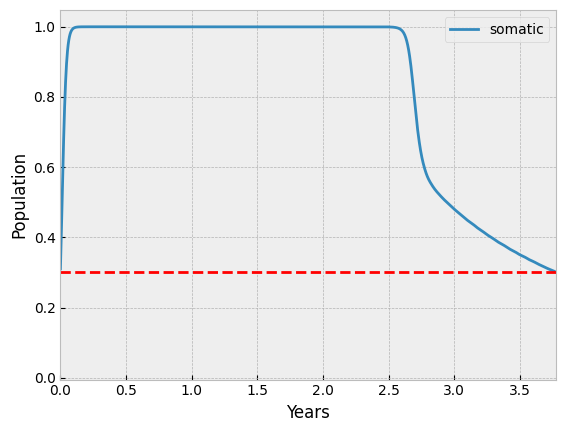

In [17]:
mouse_2eq_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 3.78
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09
Max: 3.0
Max deriv: 13724973.0
Ratio of max deriv to total lifespan in %: 72.7


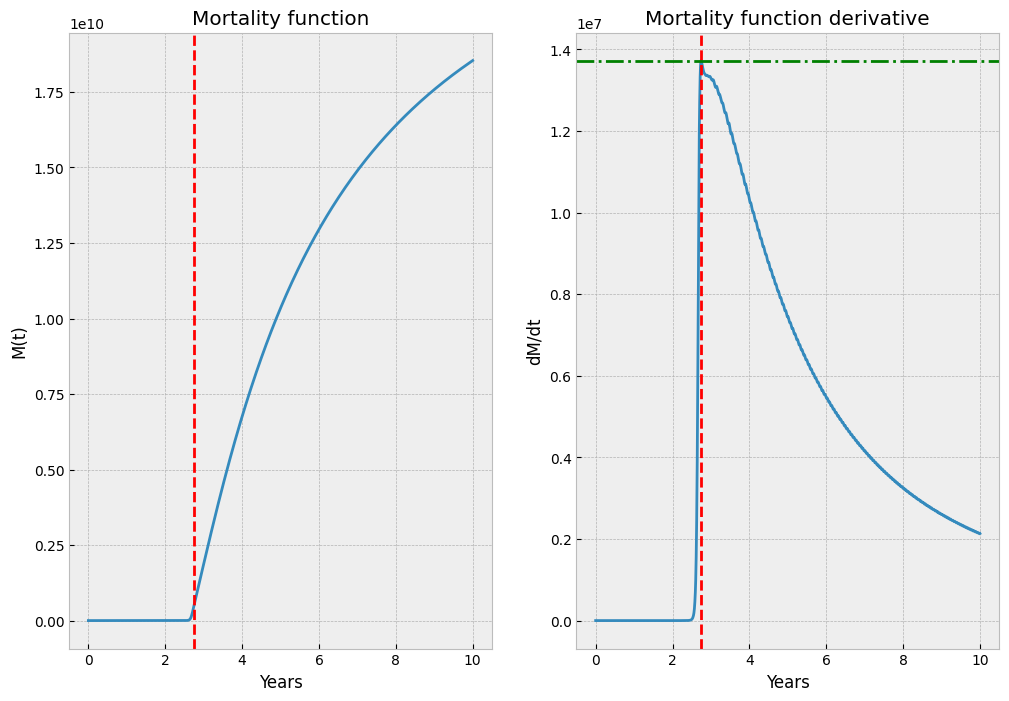

In [18]:
mouse_2eq_conf.plot_curves('mortality function')

##### We can see that the population curve and mortality function plot have similar shapes as for a human liver. We can even see some patterns, such that 4 years is nearly twice larger than avarage mice lifespan and mortality function reaches it maximum on a 0.727*lifespan point (0.773 for human liver).

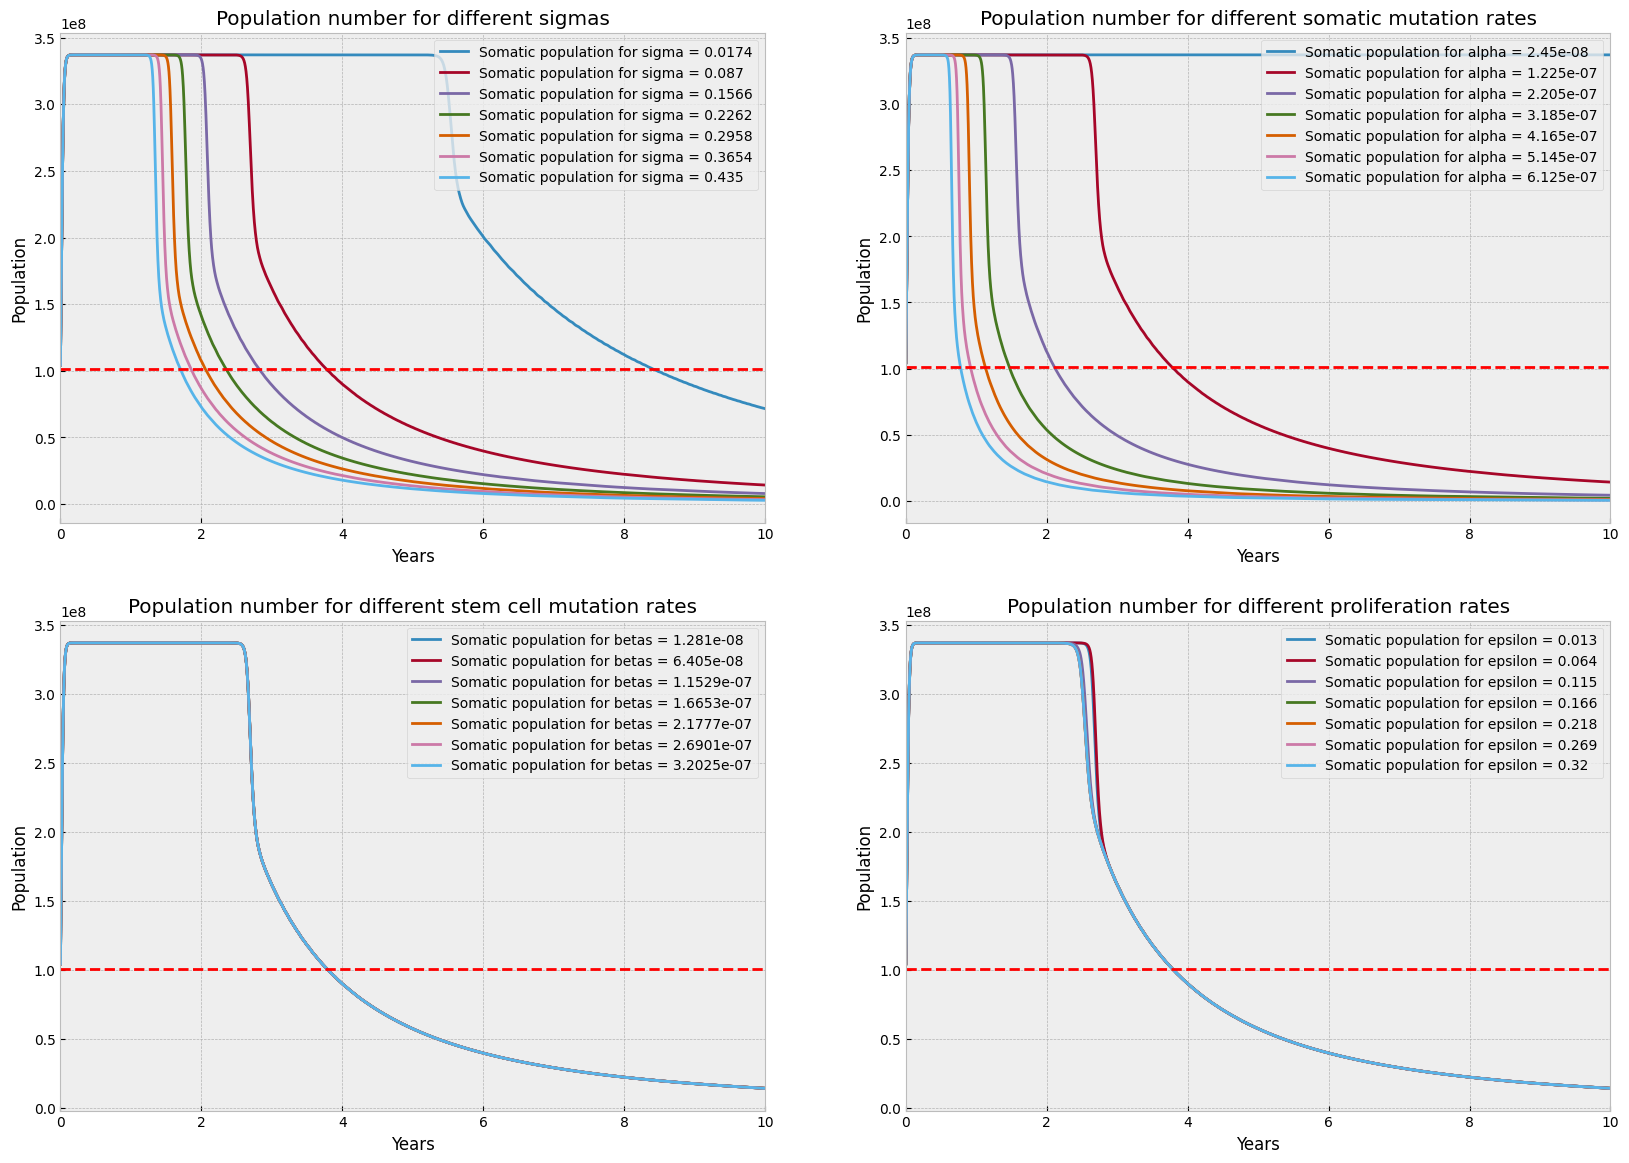

In [19]:
mouse_2eq_conf.variator(sampling_freq=7, x_bound = 10)

##### Here we can see the same situation for $\beta$, but $\epsilon$ value has an influence on somatic cells population. But anyway, it doesn't result in different lifespan.

Lower bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09
----------------------------------------
Upper bound result:
Life expentancy (years): 0.78
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09


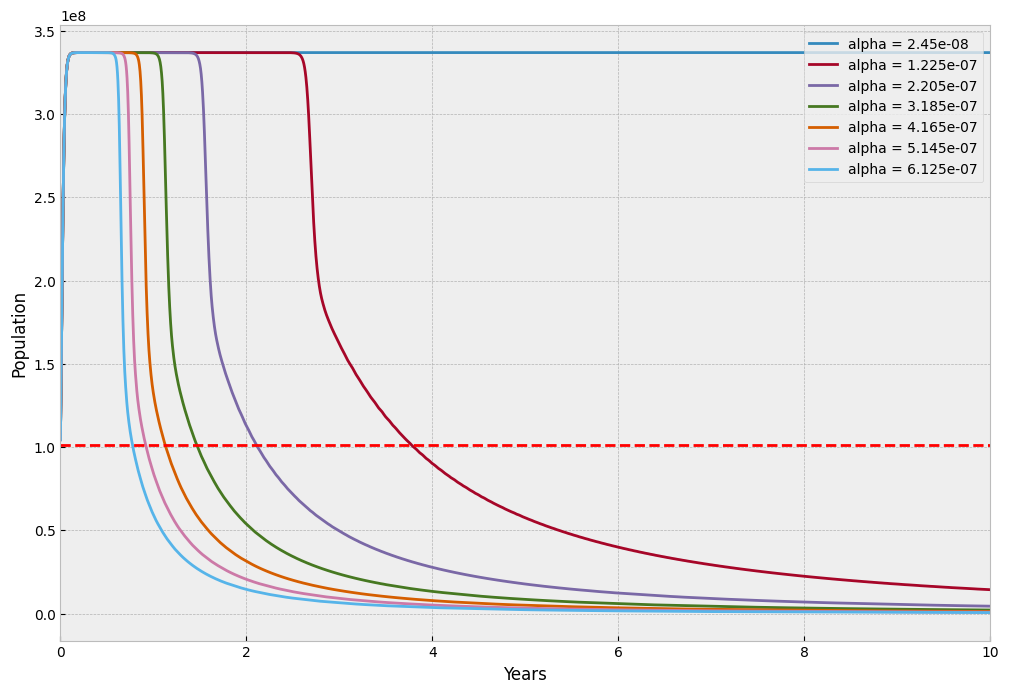

In [20]:
mouse_2eq_conf.variator(sampling_freq=7, only_alpha=True, x_bound=10)

Lower bound result:
Life expentancy (years): 1.84
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.47
----------------------------------------
Upper bound result:
Life expentancy (years): 8.41
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.02


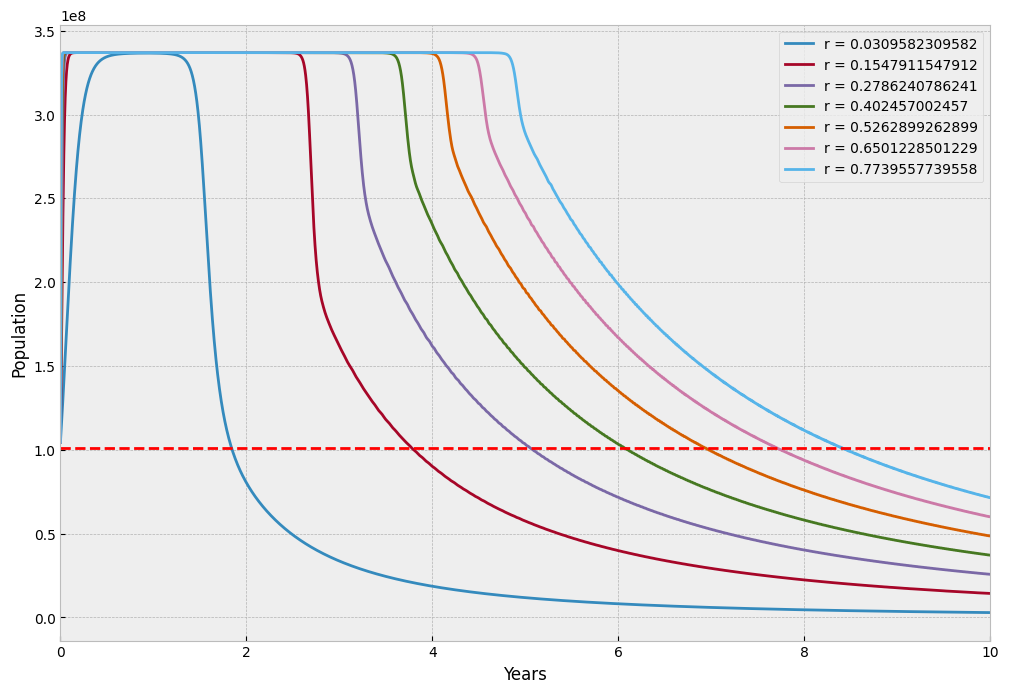

In [21]:
mouse_2eq_conf.variator(sampling_freq=7, only_r=True, x_bound=10)

Lower bound result:
Life expentancy (years): 8.42
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09
----------------------------------------
Upper bound result:
Life expentancy (years): 1.7
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09


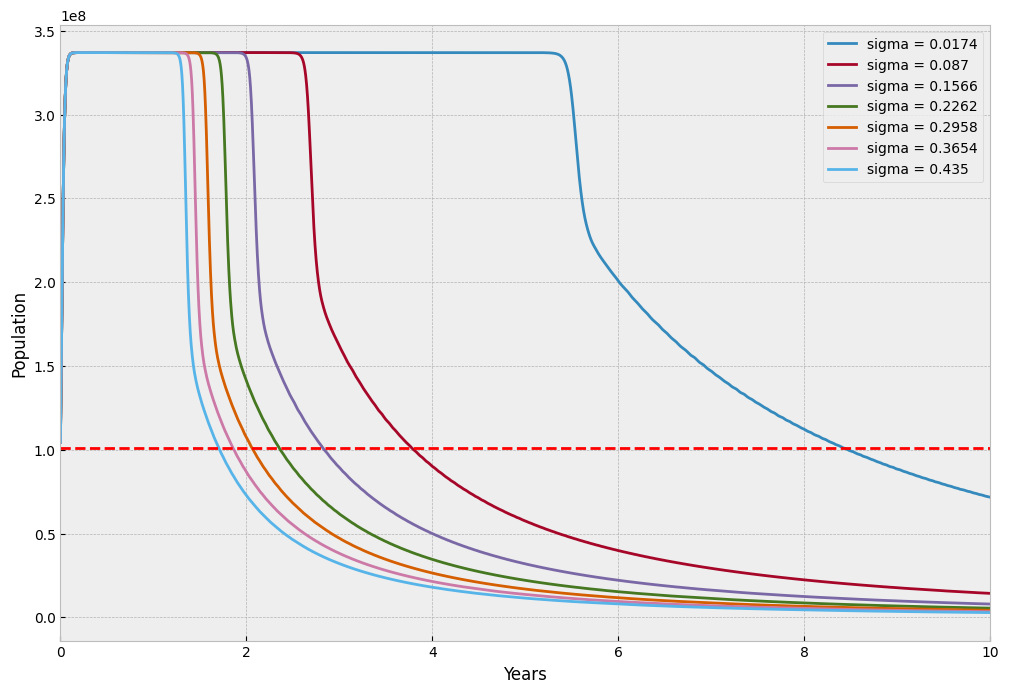

In [22]:
mouse_2eq_conf.variator(only_sigma=True, x_bound=10, sampling_freq=7)

##### Due to a very small population size compared to human organs, this system is not so stable, so for variation we take lower sampling frequency (7 compared to 10). Overall, we can see the same patterns as for human liver. We get similar values for upper and lower bounds and see the same 'limit of lifespans' as for human lungs epithelium and liver.

##### As it was shown in the above tests, $\beta$ and $\epsilon$ values don't play a big role for somatic cells population. This leads to a thought that maybe for such system there is no need for the second equation. If we go this way we have one-eq system that represents only somatic cells population:

$$
    \frac{dX}{dt} = rX(1 - \frac{X}{K}) - \alpha X - \mu (X, t)
$$
$$
    \mu (X, t) = \sigma \frac{(\alpha X t)^{2}}{2}[1 - \frac{X}{K}]
$$

We can also keep track of the mutants in the population by deviding them on the ones that can experience cell division and ones that can't. For such system we have:

$$
    \frac{dX}{dt} = rX(1 - \frac{X}{K}) - \alpha X - \mu (X,C,t)
$$


$$
    \frac{dC}{dt} = rC(1 - \frac{C}{K}) + z\alpha X - dC
$$


$$
    \frac{dF}{dt} = (1-z)\alpha X + dC
$$

$$
    \mu(X,C) = \sigma \frac{(C + (1-z)\alpha X t + d C t)^2}{2}[1 - \frac{X}{K}]
$$

Here $C$ denotes mutants that can reproduce and $F$ are the ones that can't. $z$ represents the proportion of mutants that go to $C$ population on every time step and $d$ is a proportion of alive mutants that die each mitosis.

The logic for mortality function is basically the same here as for two equation system, we just take into the account dead mutants that can be approximated as $(1-z)\alpha X t + d C t$ at any moment of time and alive mutants as $C$.

##### Now we can look on one-equation system. Config initialization controls mutant population by a bool argument include_mutants. If we want them, we set it to True and False if don't.

In [2]:
liver_1eq_conf = Somatic_LS(include_mutants=False)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: liver,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


##### Here we can check how single equation system performs compared to two-equation.

Life expentancy (years): 142.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.34


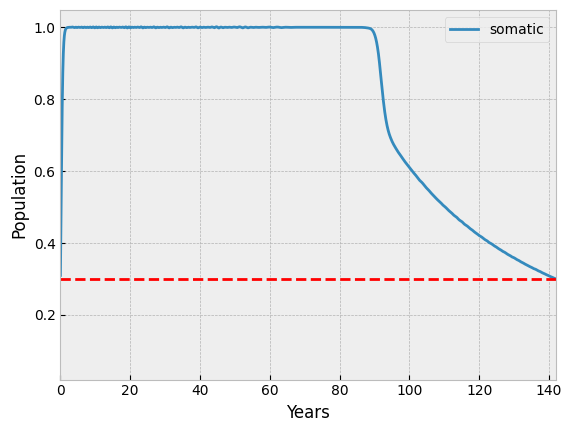

In [24]:
liver_1eq_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 142.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
Max: 110.0
Max deriv: 496835506.0
Ratio of max deriv to total lifespan in %: 77.3


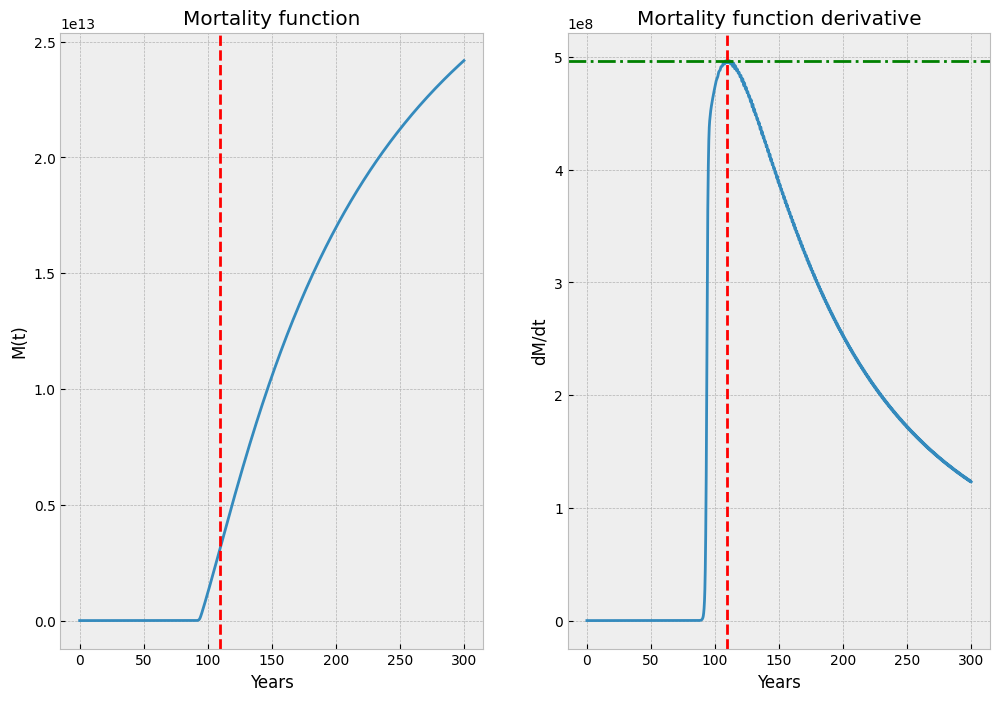

In [3]:
liver_1eq_conf.plot_curves('mortality function')

##### We can see that the lifespan hasn't changed, it's still 142 years. Also, mortality function has exactly the same characteristics.

##### Now we can try to include mutants and see what the result will be.

In [4]:
liver_1eq_mut_conf = Somatic_LS(include_mutants=True)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: liver,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: True
              ----------------------------------------
              


Life expentancy (years): 137.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


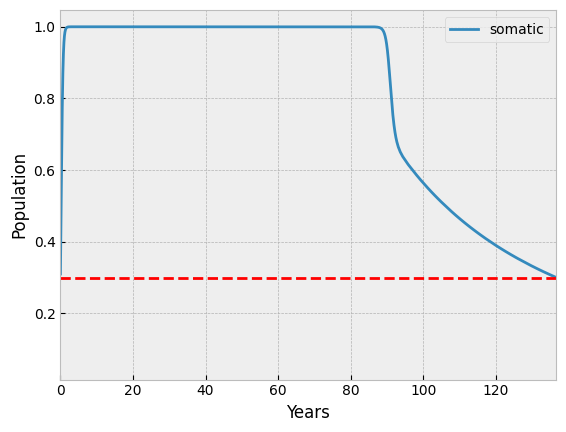

In [29]:
liver_1eq_mut_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 137.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
Max: 106.0
Max deriv: 499088479.0
Ratio of max deriv to total lifespan in %: 77.6


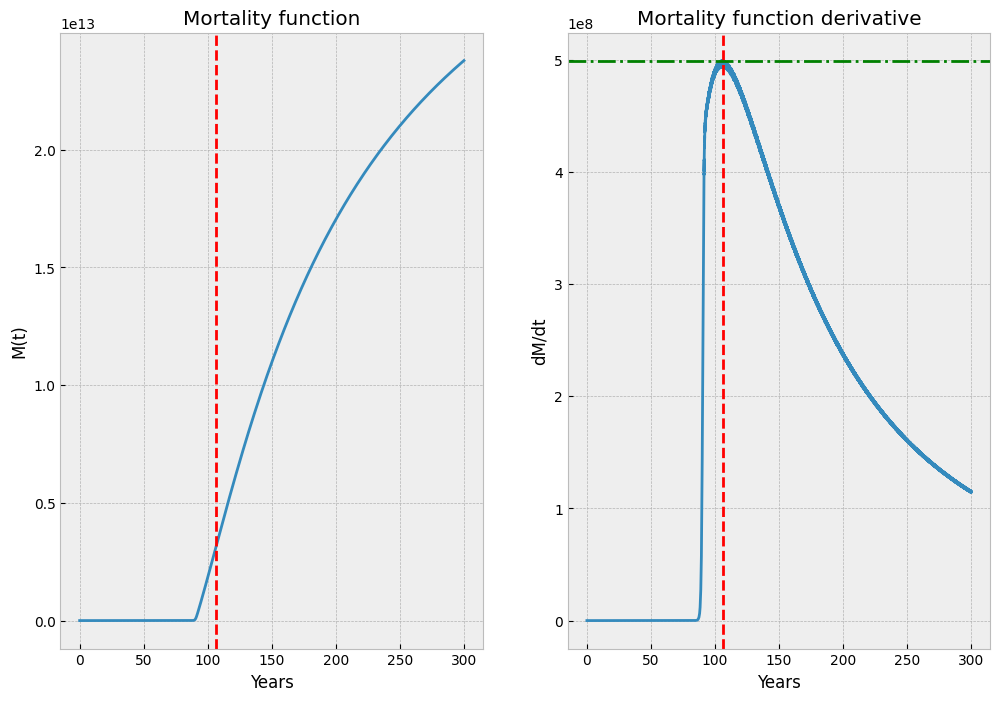

In [5]:
liver_1eq_mut_conf.plot_curves('mortality function')

#### We can see that the lifespan has slightly changed compared to situation where there are no alive mutants. The difference is just 5 years for the default set of parameters. We can launch the .variator() with the set ($\sigma, \alpha, z, d$).

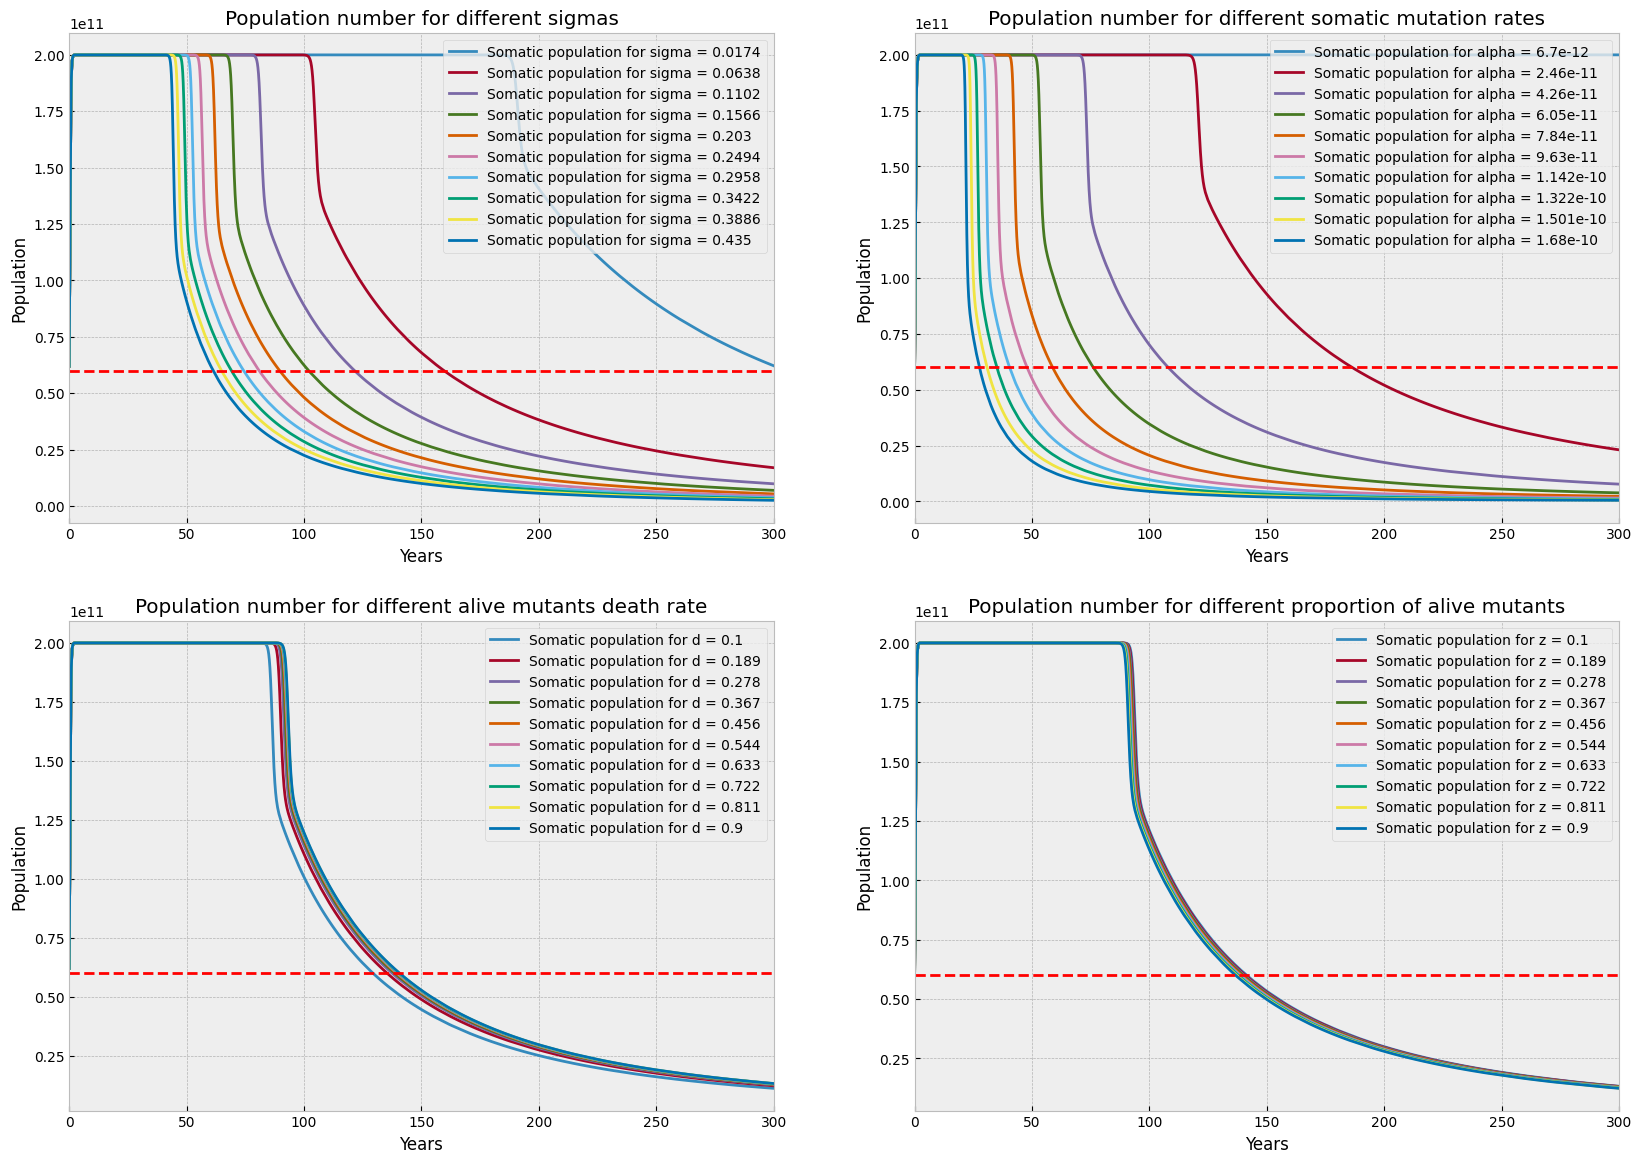

In [37]:
liver_1eq_mut_conf.variator(sampling_freq=10)

##### The results show that z and d parameters have a small influence on the overall lifespan of a somatic population, $\sigma$ and $\alpha$ follow the same 'lifespan limit' pattern as for a two-equation system. We can see that the lower the $d$ value is, the lower the lifespan. 

Lower bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
----------------------------------------
Upper bound result:
Life expentancy (years): 28.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


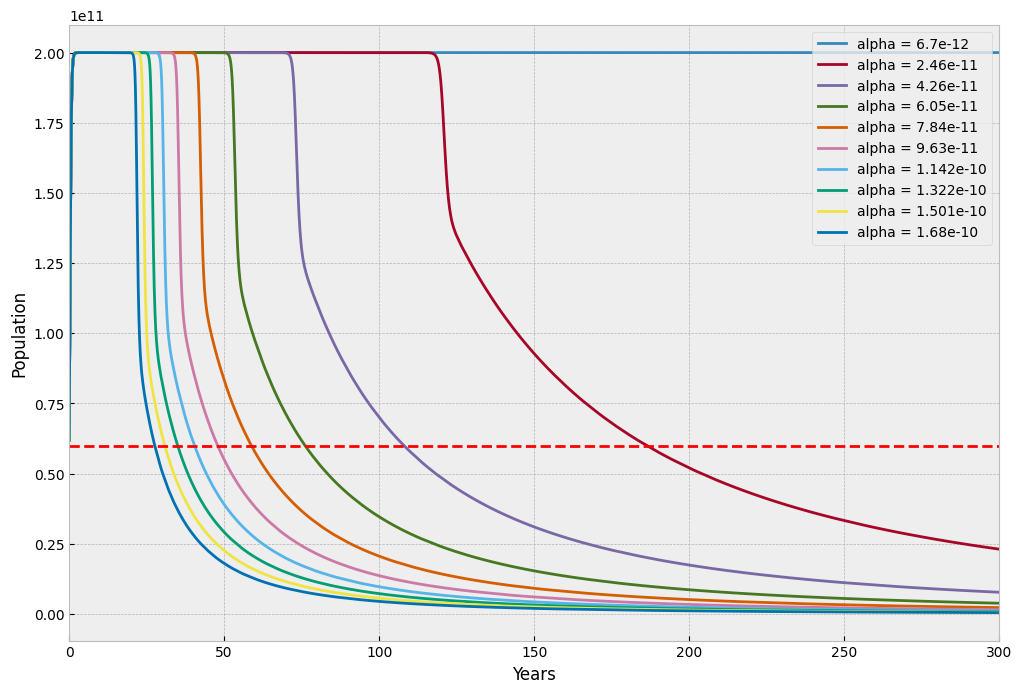

In [39]:
liver_1eq_mut_conf.variator(only_alpha=True, sampling_freq=10)

Lower bound result:
Life expentancy (years): 65.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 6.8
----------------------------------------
Upper bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.27


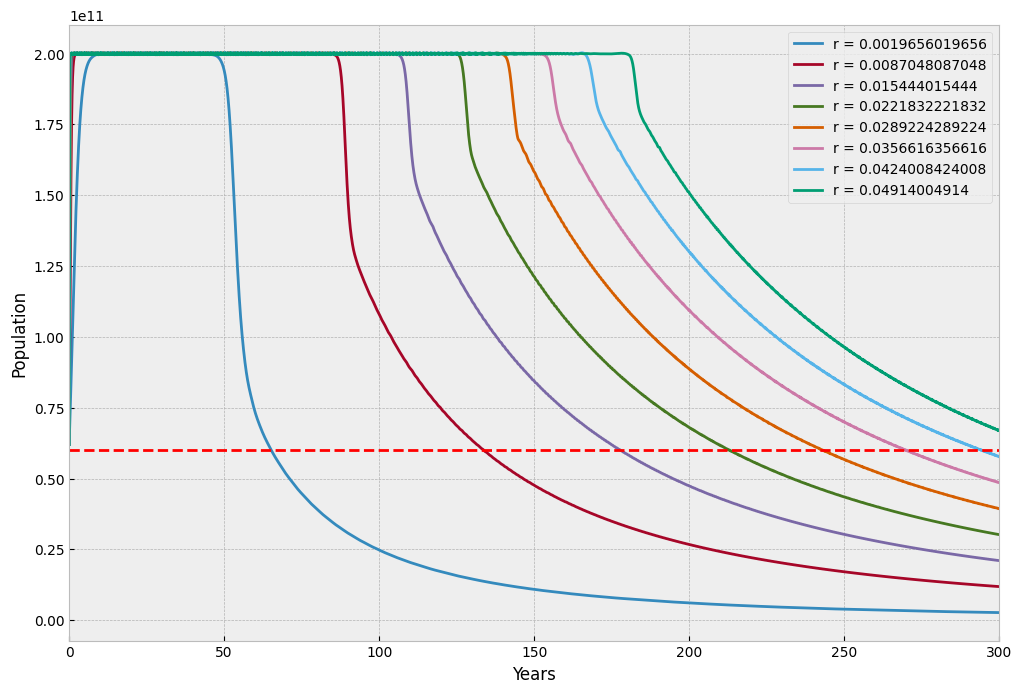

In [41]:
liver_1eq_conf.variator(only_r=True, sampling_freq=8)

Lower bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
----------------------------------------
Upper bound result:
Life expentancy (years): 61.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


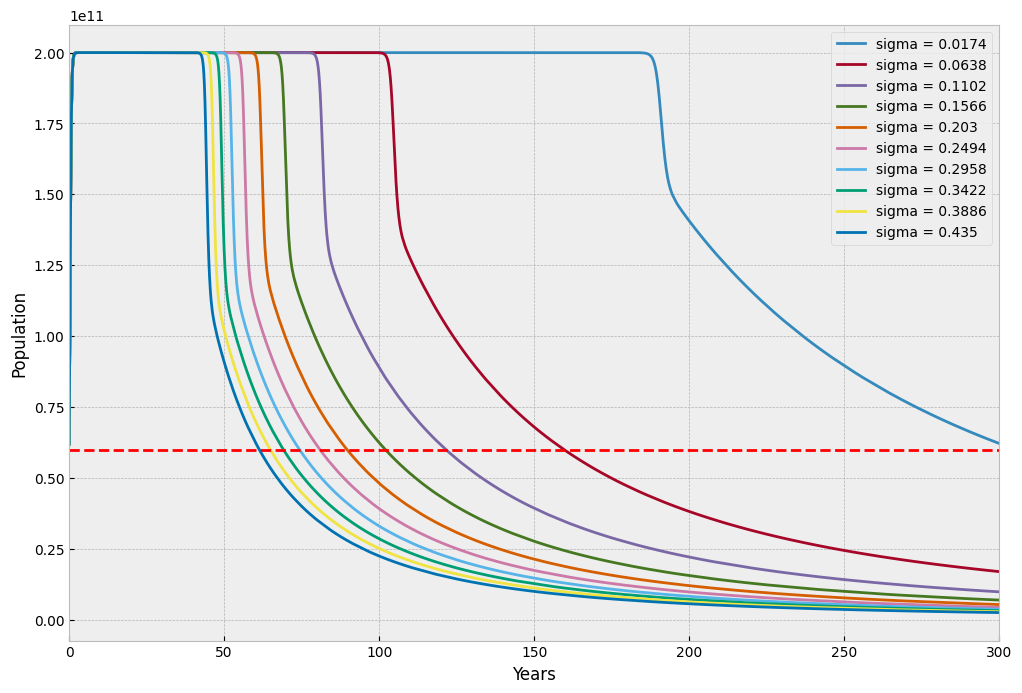

In [46]:
liver_1eq_mut_conf.variator(only_sigma=True, sampling_freq=10)

Lower bound result:
Life expentancy (years): 141.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35
----------------------------------------
Upper bound result:
Life expentancy (years): 137.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 1.35


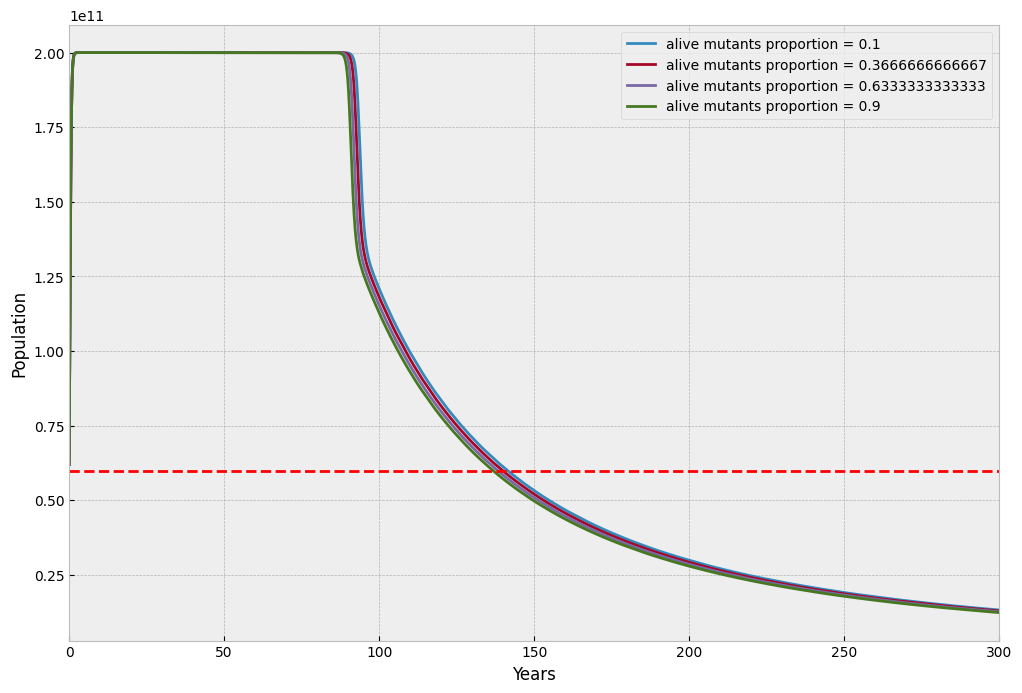

In [47]:
liver_1eq_mut_conf.variator(only_z=True)

##### Results for single parameter variation don't differ much from a two-equation system besides $z$ variation. We can see that setting $z$ to zero will result in a default single-equation system without mutants.

#### We can inspect lungs next

In [6]:
lungs_1eq_mut_conf = Somatic_LS(organ='lungs', include_mutants=True)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: lungs,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: True
              ----------------------------------------
              


In [49]:
lungs_1eq_conf = Somatic_LS(organ='lungs', include_mutants=False)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: lungs,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


Life expentancy (years): 208.0
--------------------------------------------------
Havent regenerated


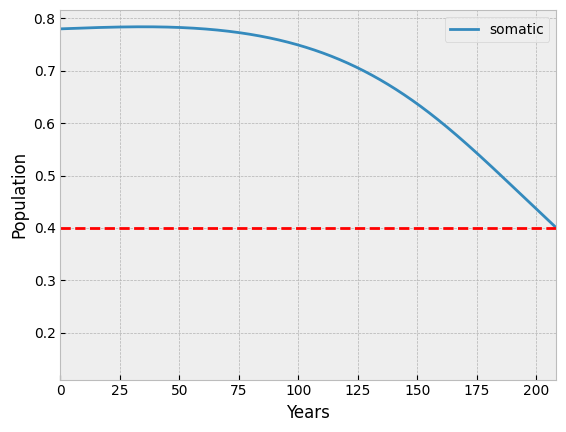

In [50]:
lungs_1eq_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 208.0
--------------------------------------------------
Havent regenerated


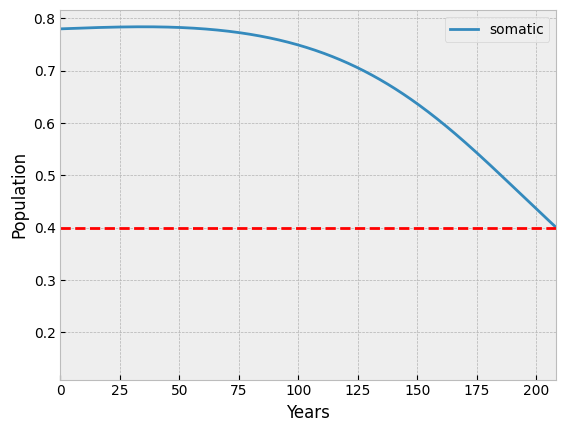

In [51]:
lungs_1eq_mut_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 208.0
--------------------------------------------------
Havent regenerated
Max: 193.0
Max deriv: 118840.0
Ratio of max deriv to total lifespan in %: 92.4


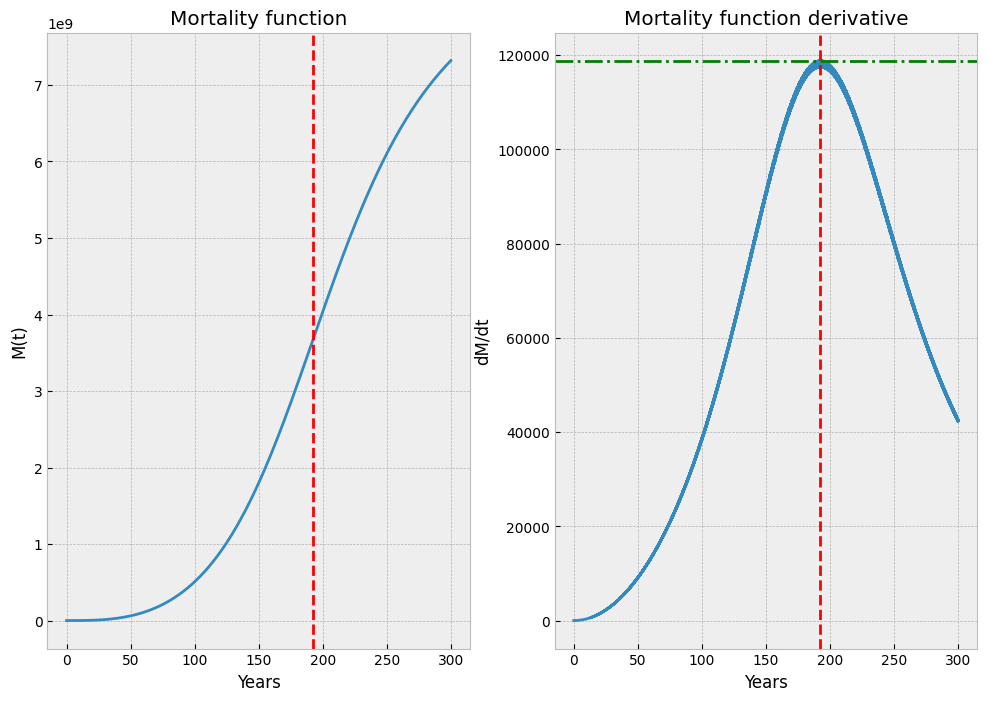

In [7]:
lungs_1eq_mut_conf.plot_curves('mortality function')

##### We can see that for lungs there is no difference between a system with mutants and without them. Launching a .variator() will prove it.

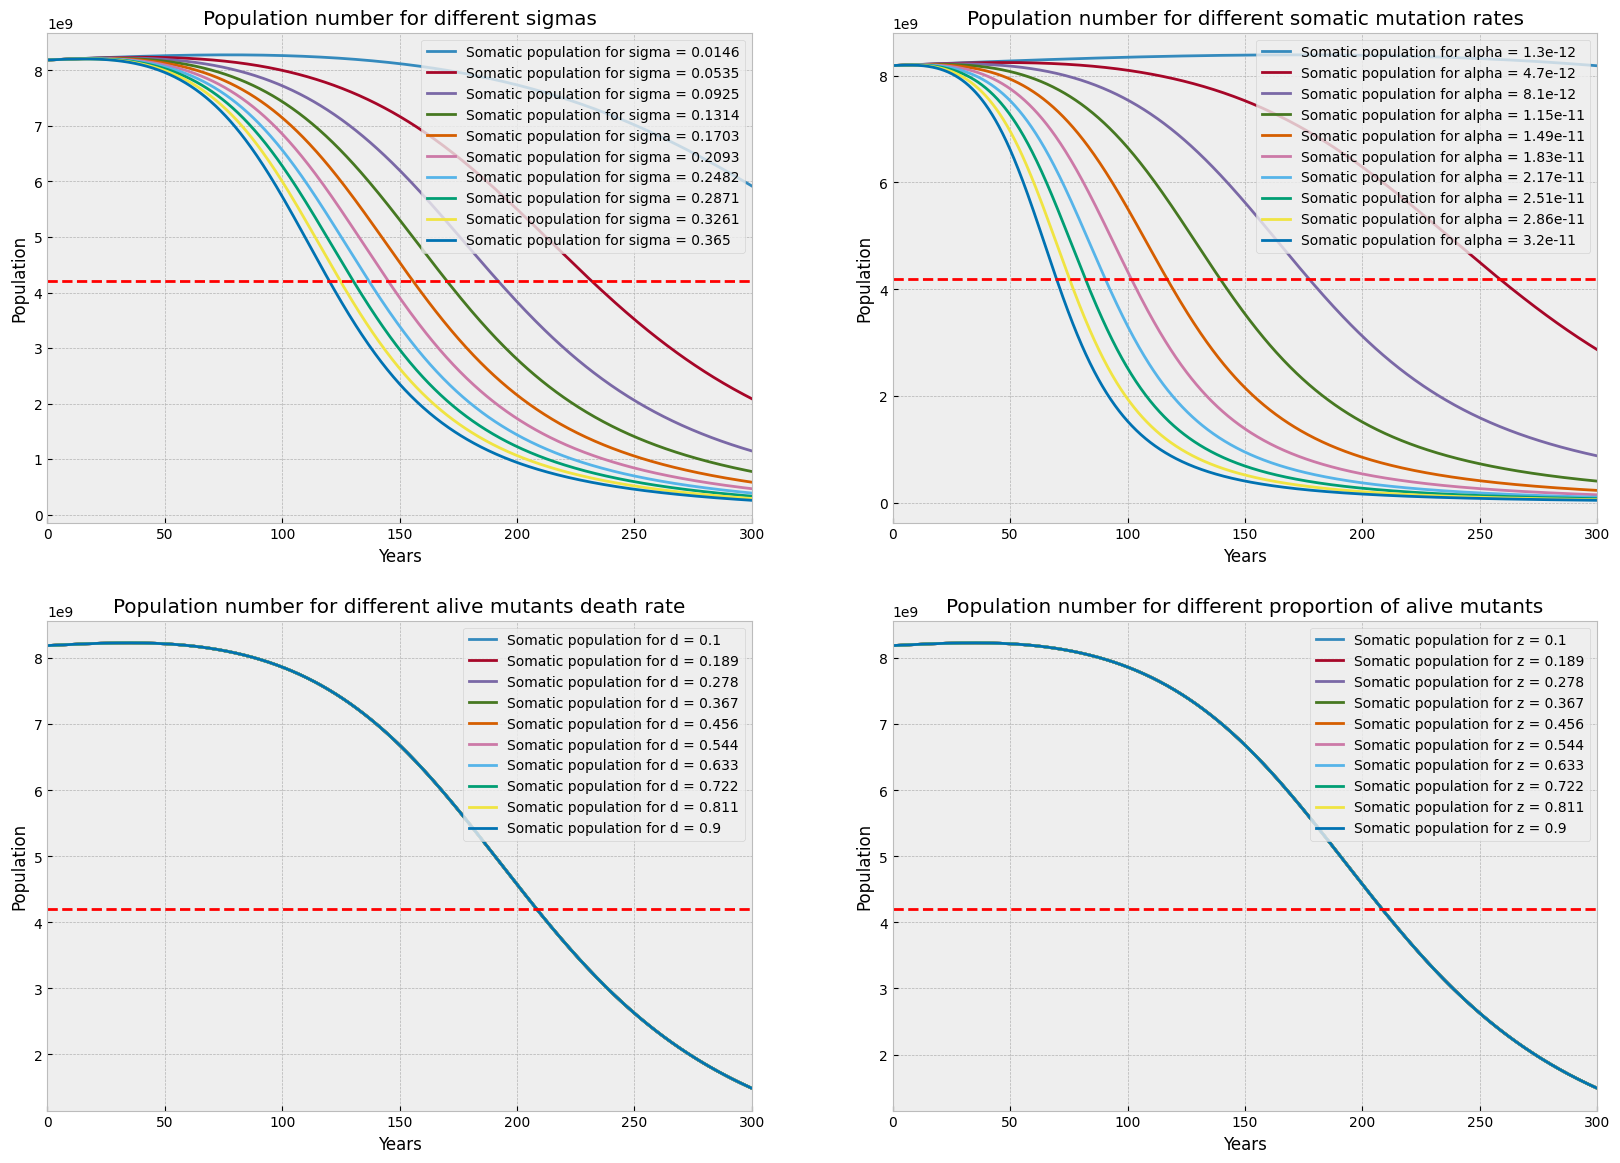

In [52]:
lungs_1eq_mut_conf.variator(sampling_freq=10)

##### We can see that varying $z$ and $d$ does not make any difference for a somatic cells lifespan.

Lower bound result:
Havent died
--------------------------------------------------
Havent regenerated
----------------------------------------
Upper bound result:
Life expentancy (years): 70.0
--------------------------------------------------
Havent regenerated


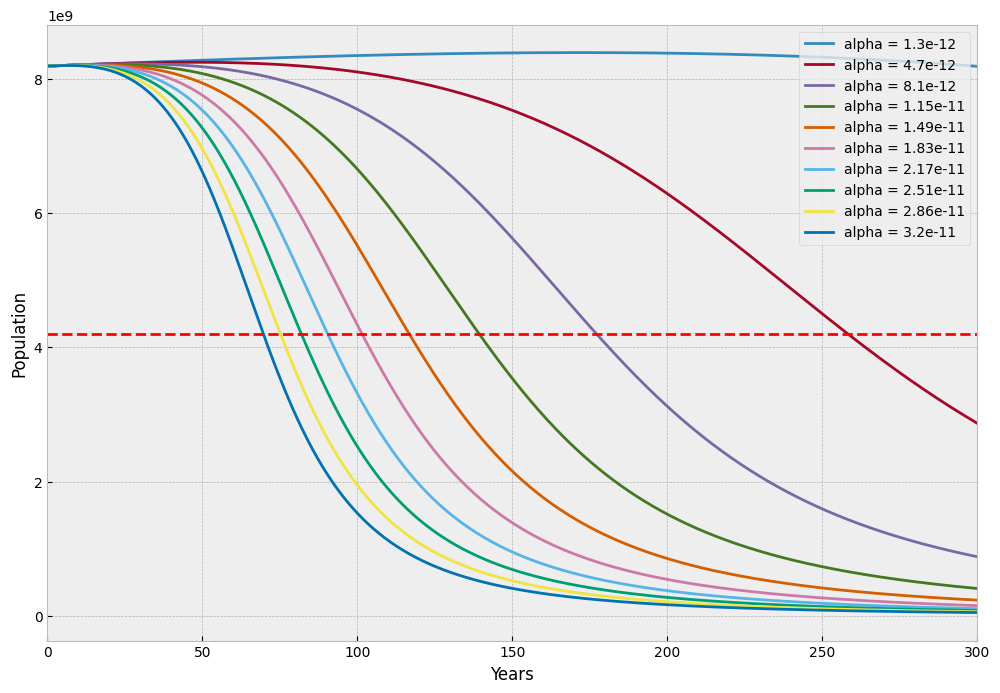

In [54]:
lungs_1eq_mut_conf.variator(only_alpha=True, sampling_freq=10)

Lower bound result:
Life expentancy (years): 203.0
--------------------------------------------------
Havent regenerated
----------------------------------------
Upper bound result:
Life expentancy (years): 235.0
--------------------------------------------------
Havent regenerated


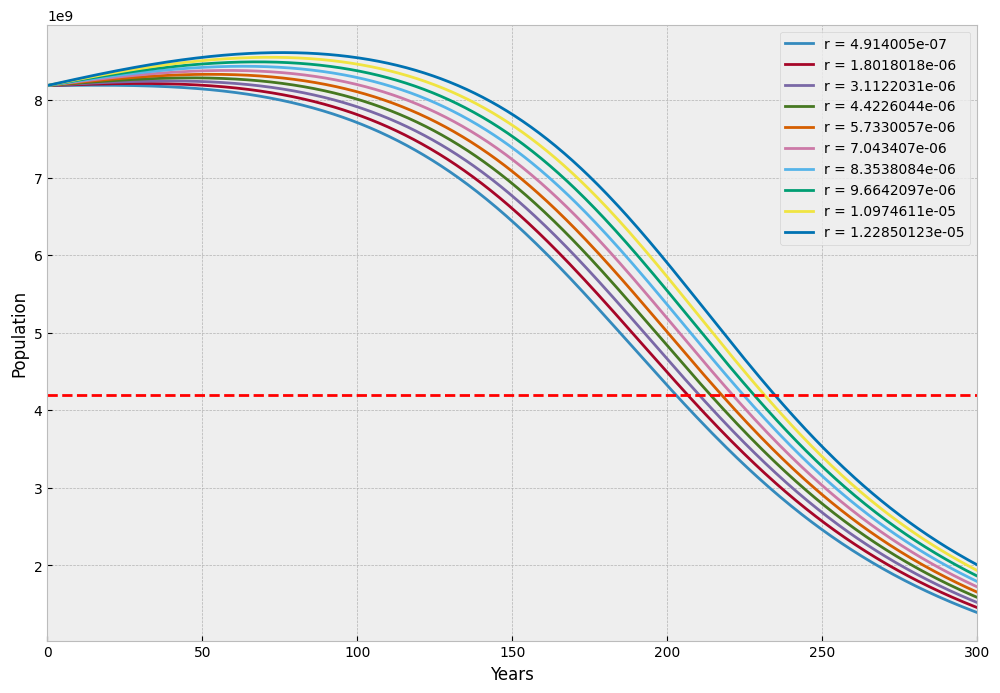

In [55]:
lungs_1eq_mut_conf.variator(only_r=True,sampling_freq=10)

Lower bound result:
Havent died
--------------------------------------------------
Havent regenerated
----------------------------------------
Upper bound result:
Life expentancy (years): 120.0
--------------------------------------------------
Havent regenerated


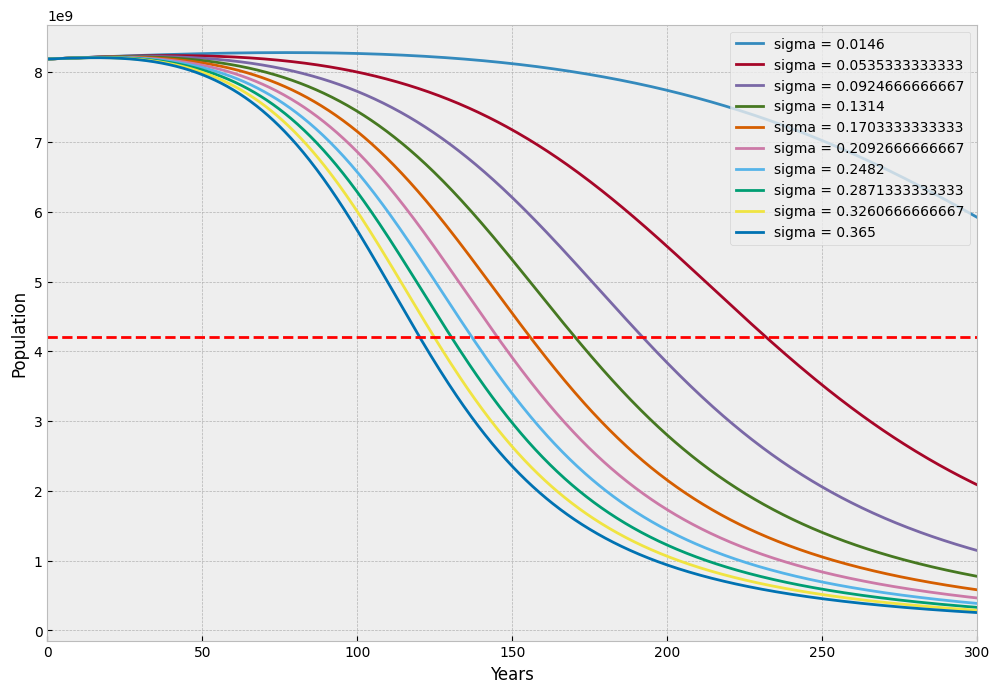

In [56]:
lungs_1eq_mut_conf.variator(only_sigma=True, sampling_freq=10)

##### We can see that the results of single parameter variation don't differ too much from a two-equation system results.

##### Now we can proceed to a mouse liver

In [89]:
mouse_1eq_conf = Somatic_LS(organ='mouse liver', end_time=10, include_mutants=False)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: mouse liver,
              --start: 0.0 years,
              --end: 10.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


In [63]:
mouse_1eq_mut_conf = Somatic_LS(organ='mouse liver', end_time=10, include_mutants=True)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: mouse liver,
              --start: 0.0 years,
              --end: 10.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: True
              ----------------------------------------
              


Life expentancy (years): 3.78
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09


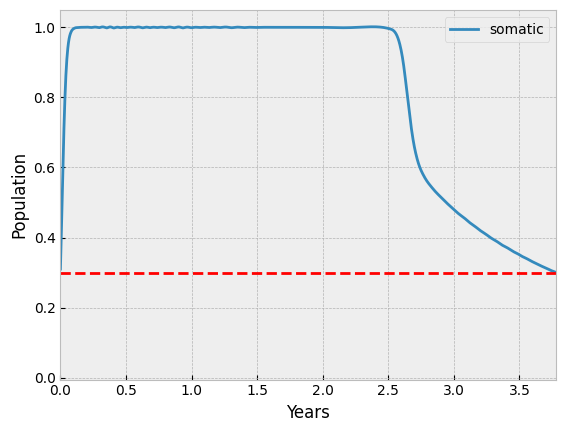

In [90]:
mouse_1eq_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 1.12
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09


ValueError: x and y must have same first dimension, but have shapes (4077,) and (469,)

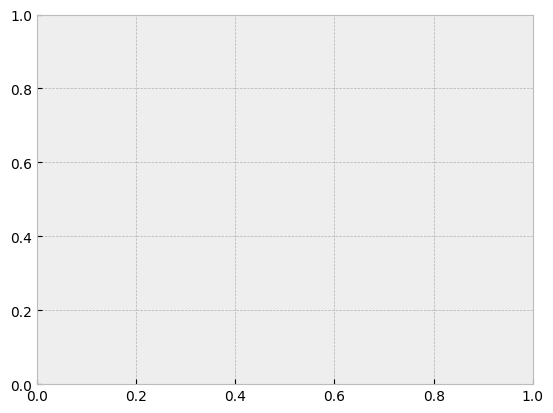

In [65]:
mouse_1eq_mut_conf.plot_curves(plot_thr=True, proportions=True)

##### We can see that for a casual one-equation system that doesn't include dividing mutants the lifespan is the same as for a two-equation system, but inclusion of 'alive' mutants results in a much lower lifespan and highly unstable system. So, in this case we can say that mutants inclusion results are worse.

Lower bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09
----------------------------------------
Upper bound result:
Life expentancy (years): 0.78
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09


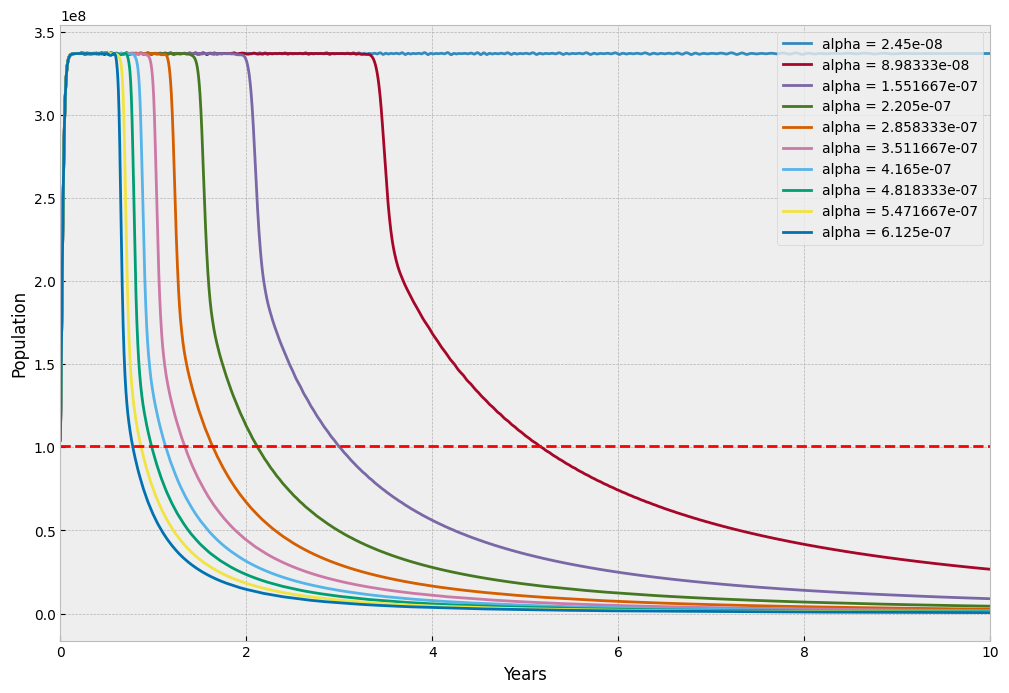

In [66]:
mouse_1eq_conf.variator(only_alpha=True, x_bound=10, sampling_freq=10)

Lower bound result:
Life expentancy (years): 1.84
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.46
----------------------------------------
Upper bound result:
Life expentancy (years): 8.4
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.02


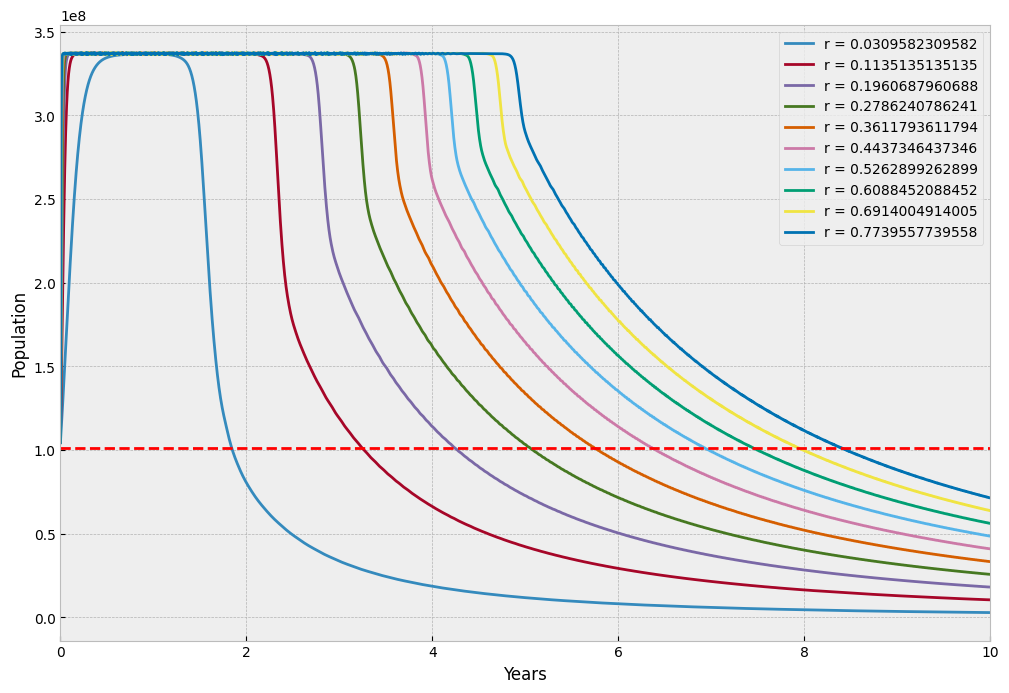

In [67]:
mouse_1eq_conf.variator(only_r=True, x_bound=10, sampling_freq=10)

Lower bound result:
Life expentancy (years): 8.42
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09
----------------------------------------
Upper bound result:
Life expentancy (years): 1.7
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.09


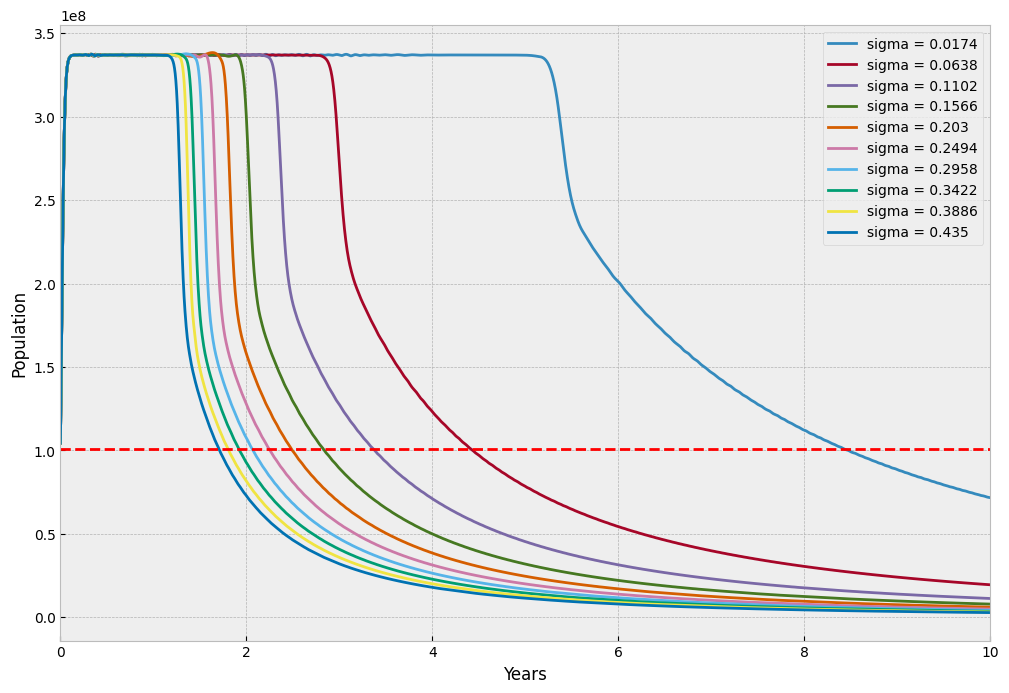

In [68]:
mouse_1eq_conf.variator(only_sigma=True, x_bound=10, sampling_freq=10)

##### Single parameter variation results are completely similar to the ones obtained with a two-equation system.

##### The final organ is a human spinal cord. For it we consider no regeneration and only one-equation system, as we don't assume any 'stem cells' present in this type of tissue.

In [11]:
spinal_mut_conf = Somatic_LS(organ='spinal cord',end_time=1500,include_mutants=True)


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: spinal cord,
              --start: 0.0 years,
              --end: 1500.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: True
              ----------------------------------------
              


In [12]:
spinal_conf = Somatic_LS(organ = 'spinal cord', end_time=1500, include_mutants=False, method='Radau')


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: spinal cord,
              --start: 0.0 years,
              --end: 1500.0 years,
              --type of system: single equation system,
              --solver method: Radau,
              --include mutants: False
              ----------------------------------------
              


Life expentancy (years): 1440.0
--------------------------------------------------
No resection


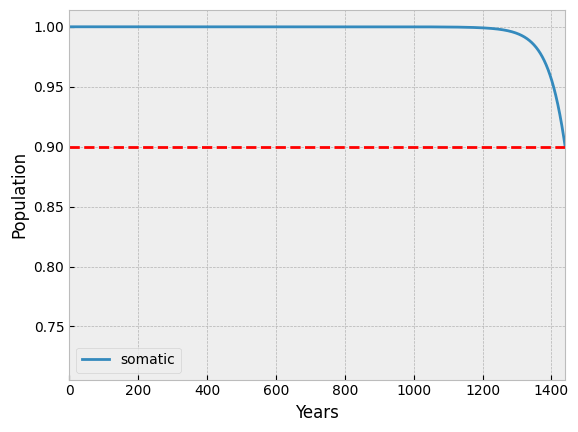

In [83]:
spinal_mut_conf.plot_curves(proportions=True, plot_thr=True)

Life expentancy (years): 1440.0
--------------------------------------------------
No resection
Max: 1500.0
Max deriv: 2116.0
Ratio of max deriv to total lifespan in %: 104.2


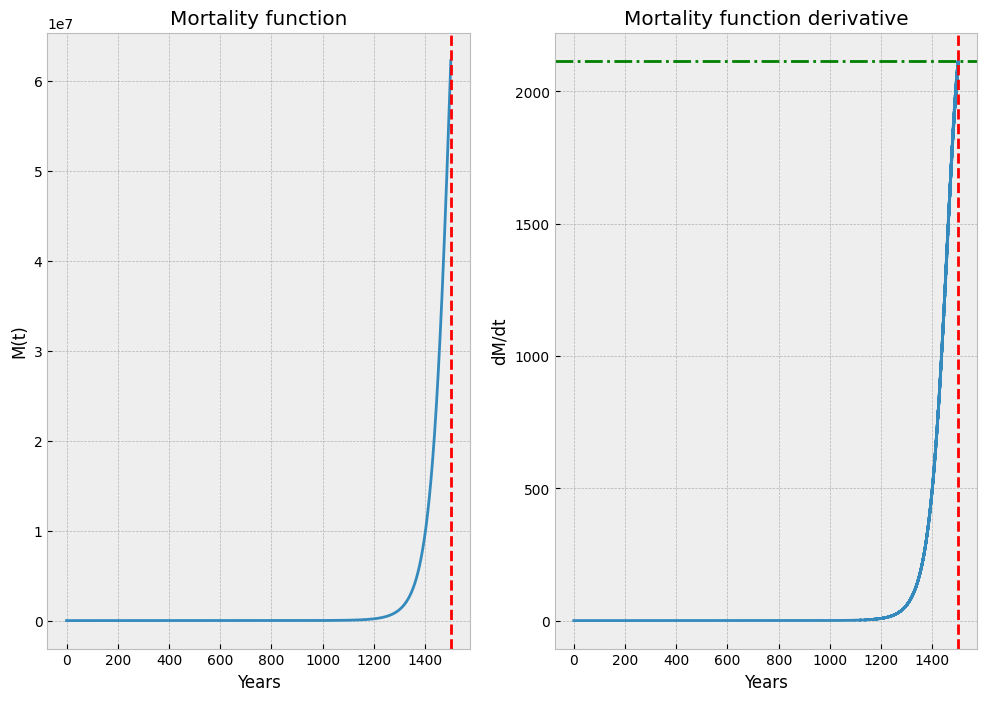

In [13]:
spinal_mut_conf.plot_curves('mortality function')

Life expentancy (years): 1443.0
--------------------------------------------------
No resection


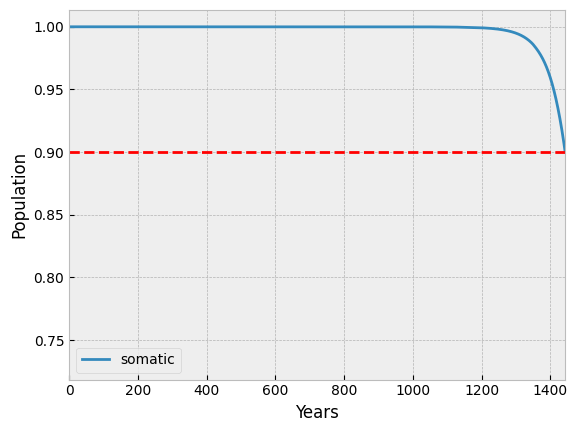

In [84]:
spinal_conf.plot_curves(plot_thr=True, proportions=True)

##### We can also estimate the amount of alive or dead mutants in a population.

Life expentancy (years): 1440.0
--------------------------------------------------
No resection


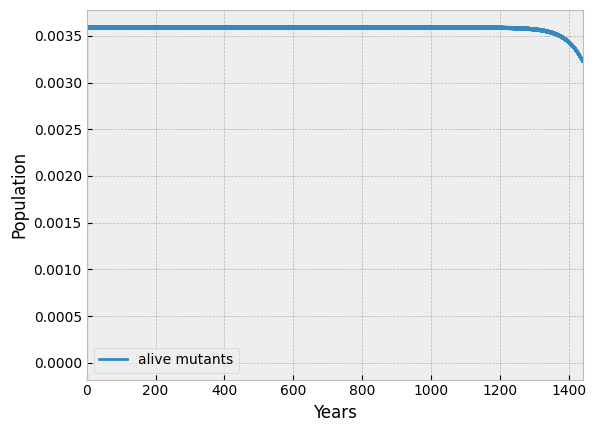

In [95]:
spinal_mut_conf.plot_curves(plot_thr=False, proportions=False, population='alive mutants')

Life expentancy (years): 1440.0
--------------------------------------------------
No resection


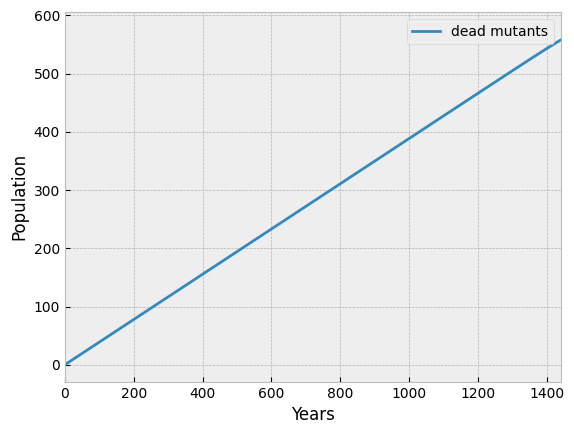

In [96]:
spinal_mut_conf.plot_curves(plot_thr=False, proportions=False, population='dead mutants')

In [91]:
spinal_conf_ = Somatic_LS(organ = 'spinal cord', end_time=1500, include_mutants=False, method='RK45')


              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: spinal cord,
              --start: 0.0 years,
              --end: 1500.0 years,
              --type of system: single equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


Life expentancy (years): 1493.0
--------------------------------------------------
No resection


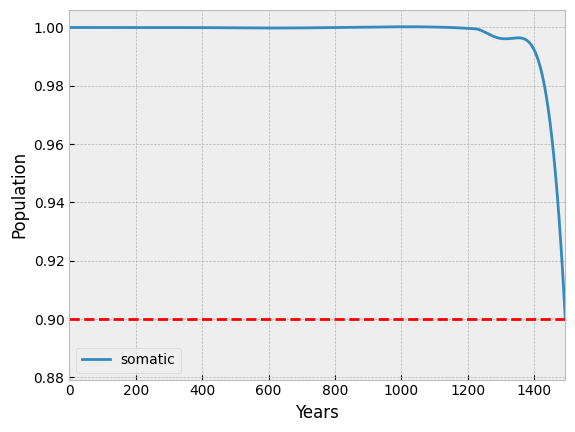

In [92]:
spinal_conf_.plot_curves(proportions=True, plot_thr=True)

##### Here results don't really vary between each other, giving the difference only in three years. Also, it is worth noticing that Radau solver method performs better here, as RK45 leads to instability and lifespan of 1493 years without any reasonable explanation. We can clearly see it on the plot above.

Lower bound result:
Havent died
--------------------------------------------------
No resection
----------------------------------------
Upper bound result:
Life expentancy (years): 485.0
--------------------------------------------------
No resection


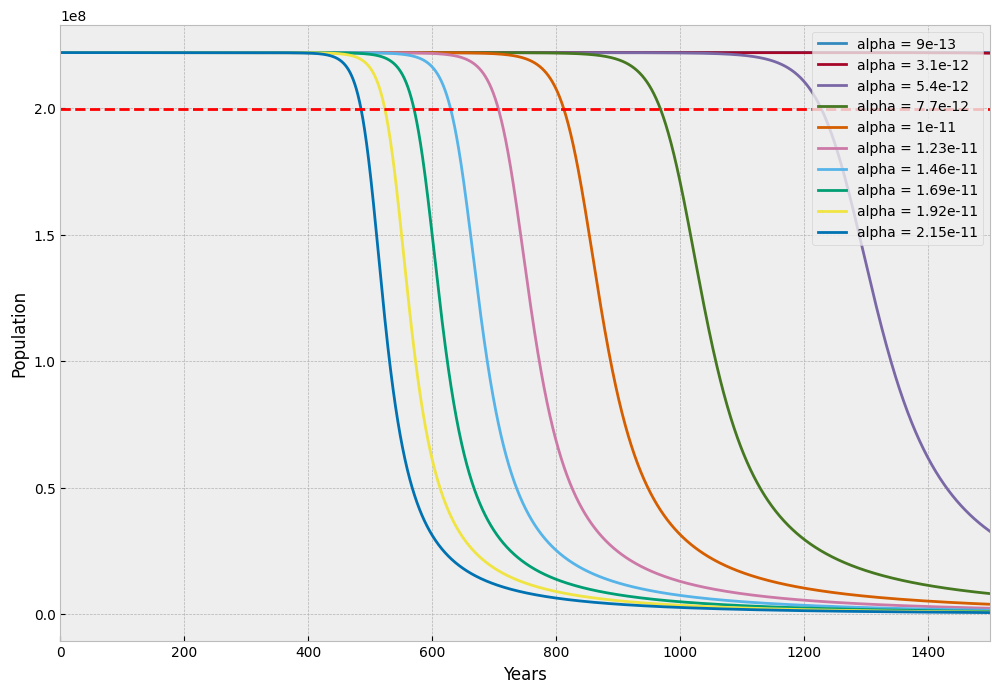

In [78]:
spinal_mut_conf.variator(only_alpha=True,x_bound=1500, sampling_freq=10)

Lower bound result:
Havent died
--------------------------------------------------
No resection
----------------------------------------
Upper bound result:
Life expentancy (years): 855.0
--------------------------------------------------
No resection


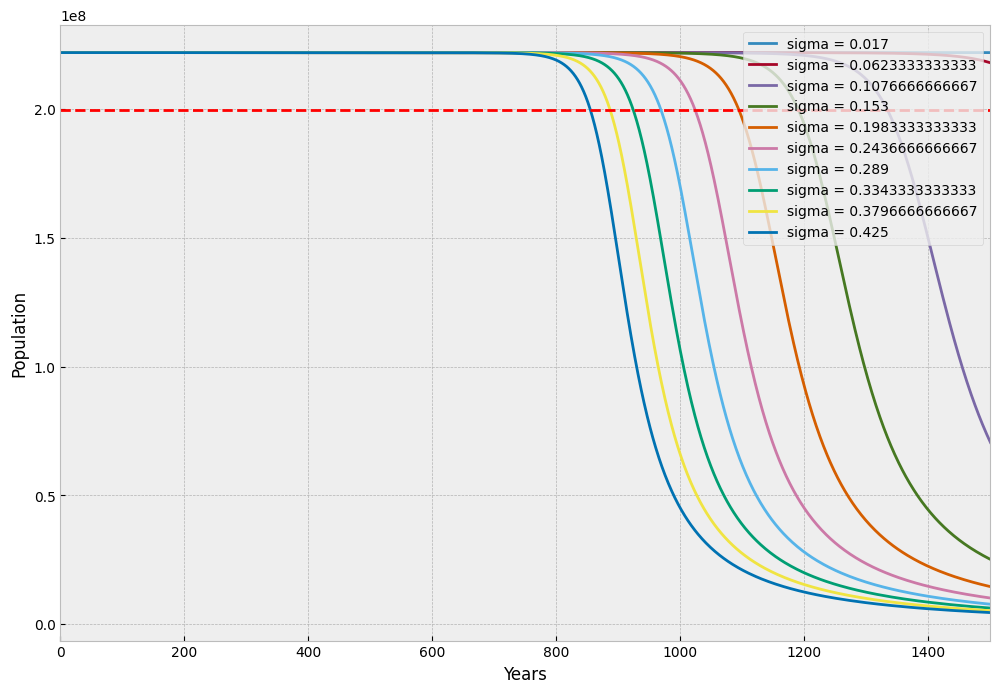

In [80]:
spinal_mut_conf.variator(only_sigma=True,x_bound=1500, sampling_freq=10)

Lower bound result:
Life expentancy (years): 1440.0
--------------------------------------------------
No resection
----------------------------------------
Upper bound result:
Life expentancy (years): 1440.0
--------------------------------------------------
No resection


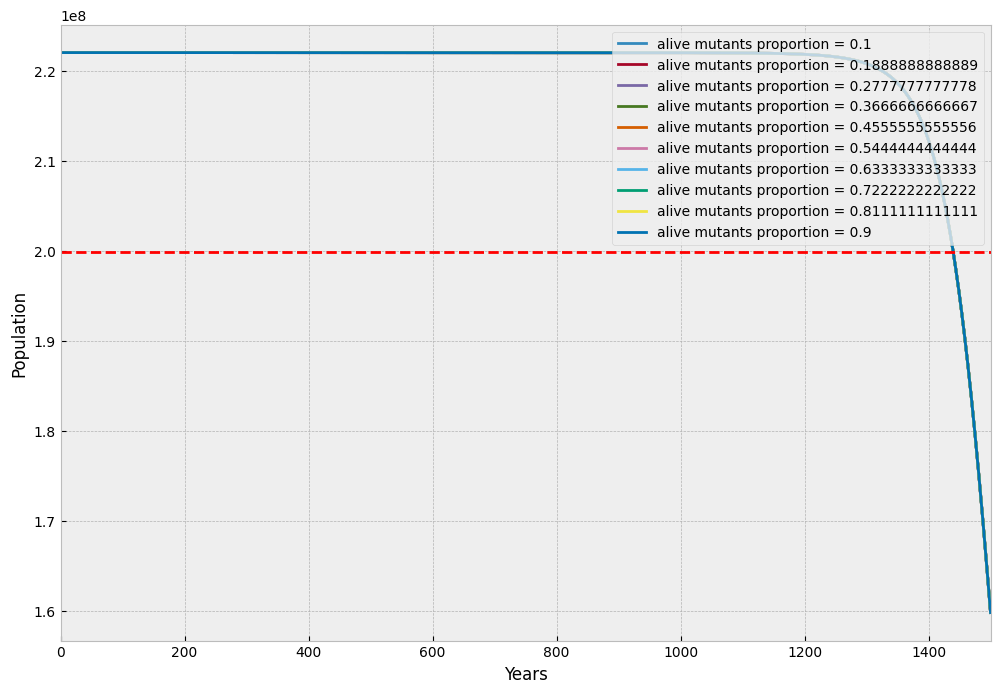

In [85]:
spinal_mut_conf.variator(only_z = True, sampling_freq=10, x_bound = 1500)

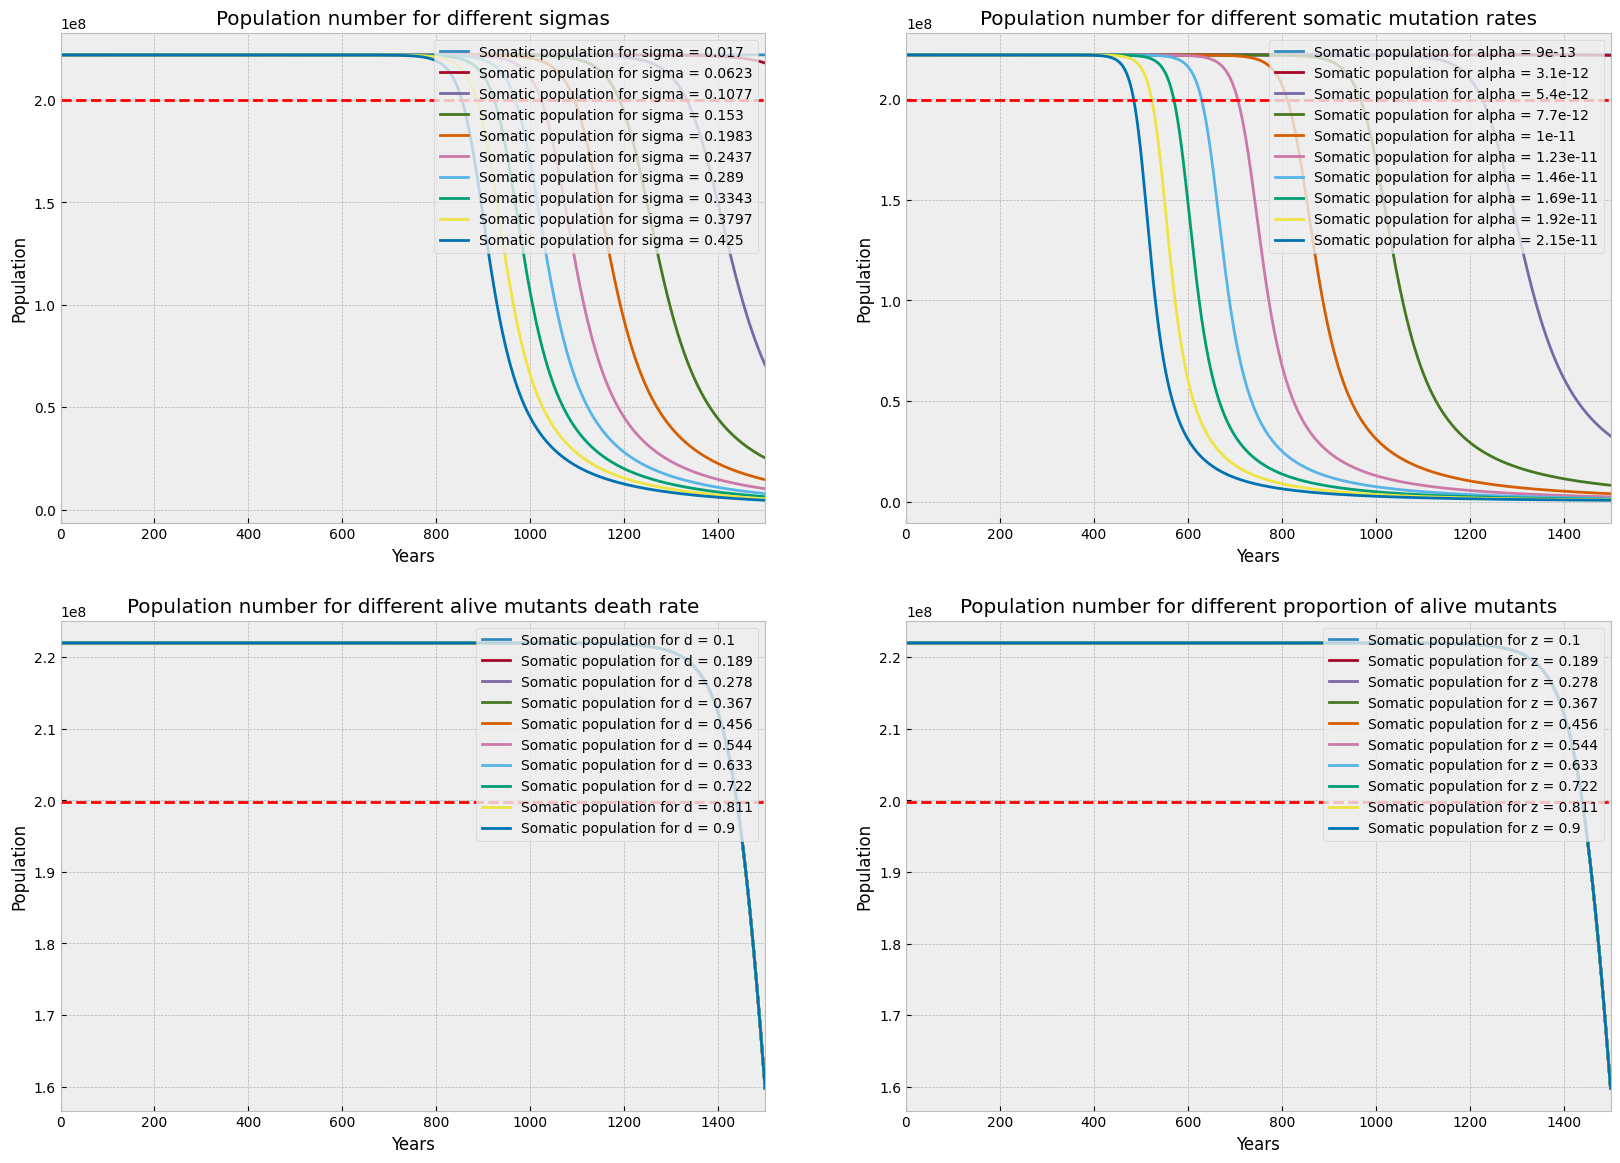

In [81]:
spinal_mut_conf.variator(x_bound=1500, sampling_freq=10)

##### We can see that there is really no clear difference for $d$ and $z$ values for spinal cord. Other organs don't depend on these parameters too, so, we can say that single-equation system without alive mutants can be used for all organs without dramatic losses. 

##### Before we observed only predefined configs and parameters, but you can also specify your own set of values for a system. As an example, we'll take a config for human liver cells and multiply each parameter by a factor of 2. Also, we'll set the cutoff to 20% of $K$ and initial conditions as 60% of $K$.

In [2]:
custom = Somatic_LS(organ = 'custom', end_time=300, equation='two')

This organ is not specified. Use your custom config, threshold and initial conditions to solve the system
Fist you need calculate_population, then lifespan

              CONFIG FOR SIMULATION HAS BEEN CREATED
              ----------------------------------------
              Final parameters set:
              --organ: custom,
              --start: 0.0 years,
              --end: 300.0 years,
              --type of system: two equation system,
              --solver method: RK45,
              --include mutants: False
              ----------------------------------------
              


In [3]:
conf = [2*0.087, 2*2e11, 2*2e11/94000, 2*4/407, 2*0.064, 2*(3.5e-9)*9.6e-3, 2*(1.83e-9)*9.6e-3, 2*4/407, 0.9, 0.239]
custom_init = [0.6*conf[1], 0.6*conf[2], 0]
custom_thr = 0.2

In [4]:
custom_sol = custom.calculate_population(custom_conf=conf, custom_init=custom_init)

In [5]:
ls = custom.lifespan(custom_solution=custom_sol, custom_thr=custom_thr, custom_conf=conf)

Life expentancy (years): 61.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.52


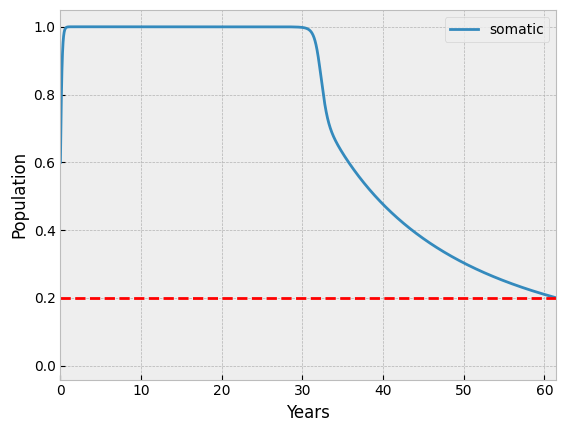

In [6]:
custom.plot_curves(custom_conf=conf, custom_thr=custom_thr, custom_ls=ls, custom_sol=custom_sol)

Max: 39.0
Max deriv: 1991459397.0
Ratio of max deriv to total lifespan in %: 63.2


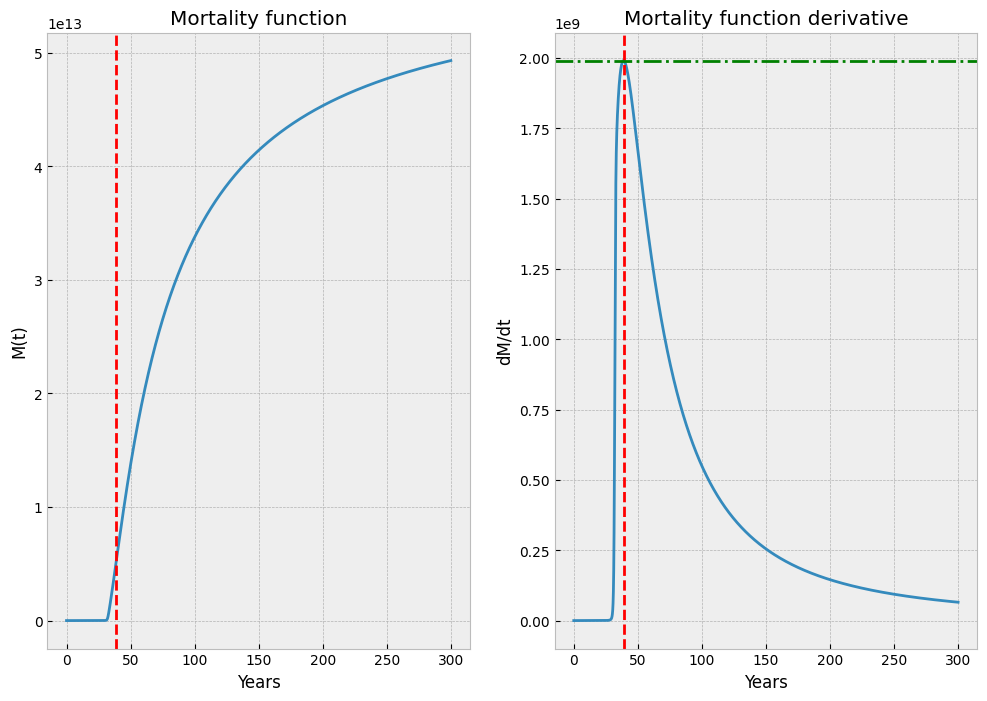

In [7]:
custom.plot_curves(population='mortality function',custom_conf=conf, custom_thr=custom_thr, custom_ls=ls, custom_sol=custom_sol)

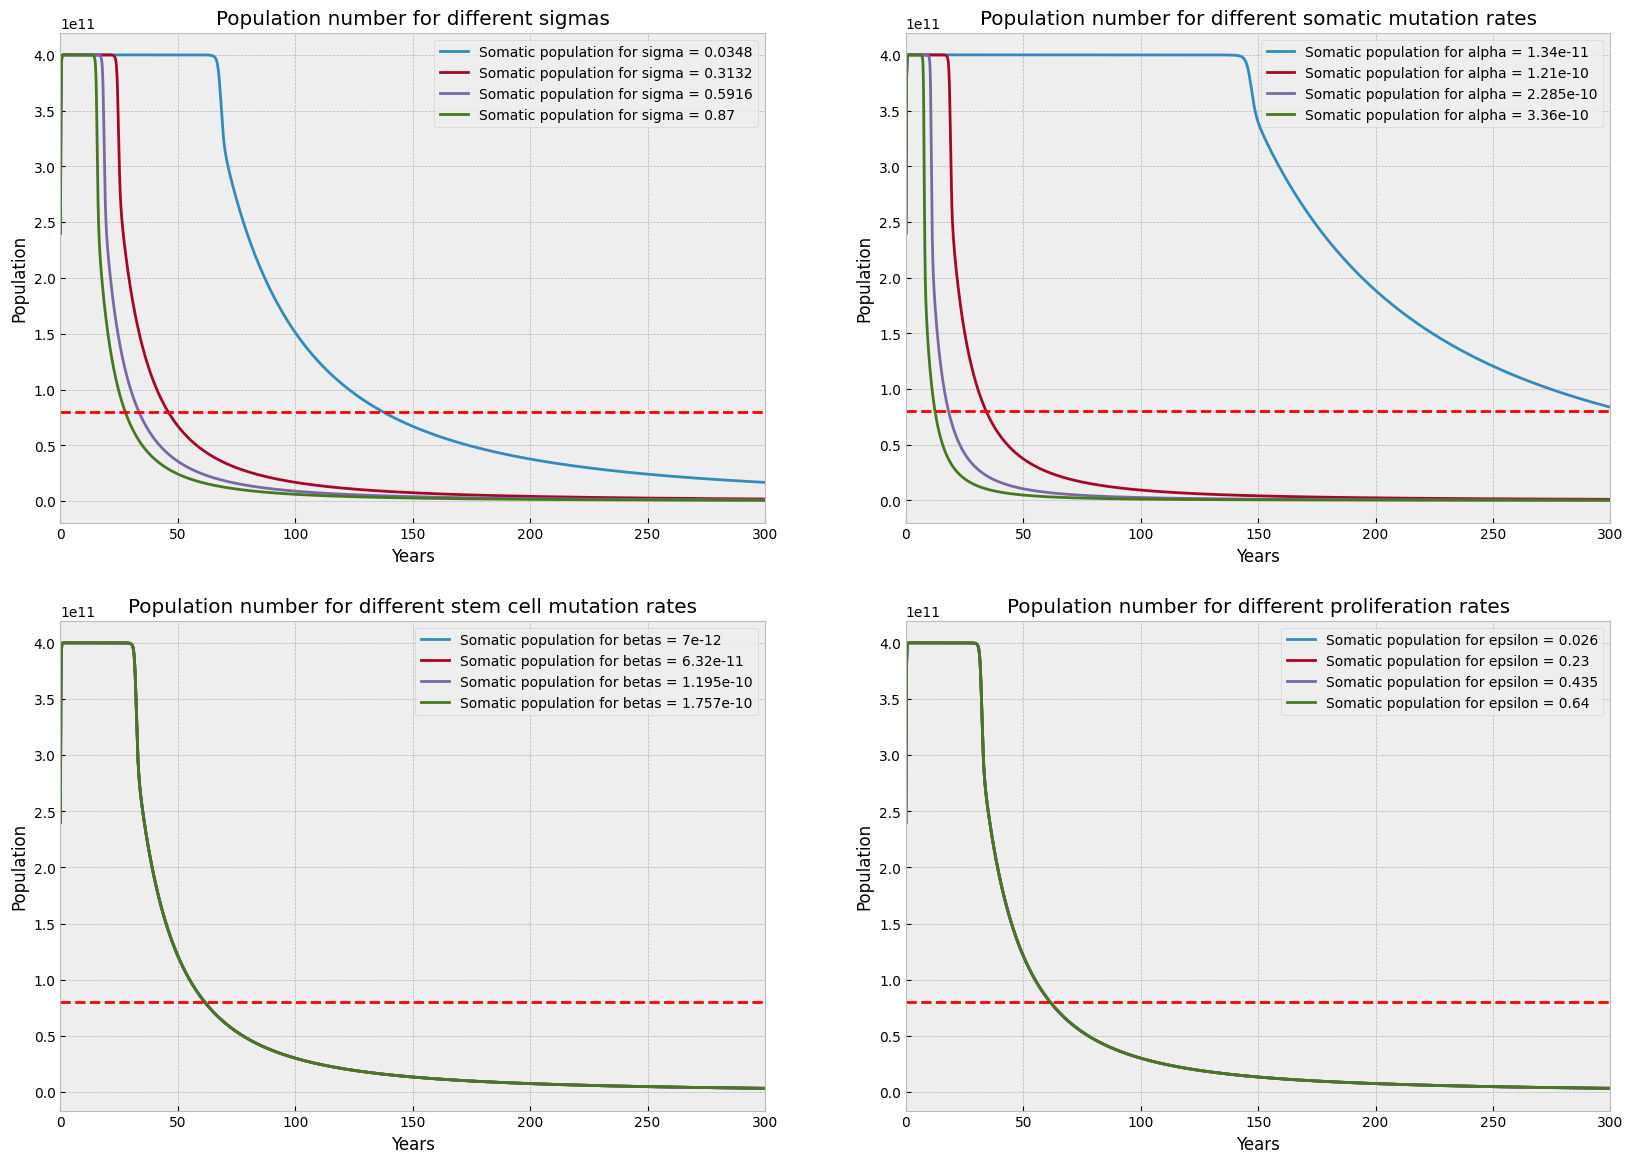

In [16]:
custom.variator(custom_init=custom_init, custom_thr=custom_thr, custom_conf=conf)

Lower bound result:
Havent died
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.52
----------------------------------------
Upper bound result:
Life expentancy (years): 12.0
--------------------------------------------------
Time of regeneration of somatic cells (years): 0.52


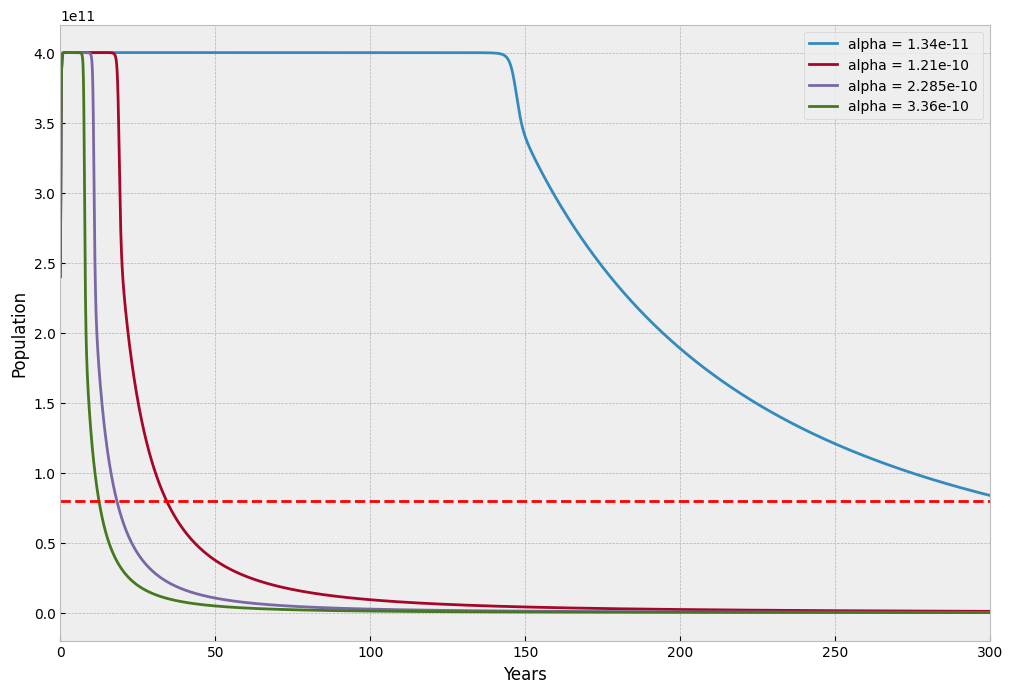

In [7]:
custom.variator(only_alpha=True, custom_conf=conf, custom_init=custom_init, custom_thr=custom_thr)